# KPMG Lighthouse
## Informe: Predicción del PIB español impacto COVID-19
### *Lo que nos dicen los datos de tendencia de Google*

La situación de crisis que estamos viviendo tendrá un impacto sin precedentes en la economía española. Existen ya muchas instituciones que predicen impactos de entre 8% y 15% del PIB anual para 2020. Estos informes de entidades bancarias, instituciones financieras y organismos internacionales tienen un enfoque por el lado de la producción y el impacto en las cadenas productivas.
Desde KPMG Lighthouse proponemos hacer un análisis similar pero basado en los patrones de comportamiento individual.
Está claro que bajo las circunstancias de confinamiento que nos toca vivir, la *presencia online* de las personas se ha potenciado aún más que lo normal. El consumo se ha trasladado a las tiendas virtuales. 
En ese sentido, Google es un reflejo de lo que las personas están haciendo en estos tiempos, en qué gastan su tiempo y a dónde han trasladado los ingresos.

Si vemos a PIB desde el punto de la oferta tal y cual se publica en el INE, podemos descomponerlo en los siguientes sectores:
* VABpb Agricultura, ganadería, silvicultura y pesca (A, CNAE 2009)
* VABpb Construcción (F, CNAE 2009)
* VABpb Industria (B-E, CNAE 2009)
* VABpb Servicios. Actividades artísticas, recreativas y otros servicios (R-T, CNAE 2009)
* VABpb Servicios. Actividades financieras y de seguros (K, CNAE 2009)
* VABpb Servicios. Actividades inmobiliarias (L, CNAE 2009)
* VABpb Servicios. Actividades profesionales, científicas y técnicas y otras (M-N, CNAE 2009)
* VABpb Servicios. Administración pública, educación y sanidad (O-Q, CNAE 2009)
* VABpb Servicios. Comercio, transporte y hostelería (G-I, CNAE 2009)
* VABpb Servicios. Información y comunicaciones (J, CNAE 2009)

La hipótesis de este trabajo es que muchos de los sectores productivos pueden ser medidos a traves de los patrones de consumo y de consultas online que hacen las personas.

Por ejemplo, el sector de hostelería, puede ser analizado con mucha certeza a traves de la tendencia en palabras clave como 'hotel', 'vuelo', 'turismo', 'habitacion', 'booking', etc...

Si somos capaces de armar un diccionario de palabras clave de cada sector, podremos tener en tiempo real datos muy importantes para predecir qué impacto tendrá cada sector, y finalmente la economía en su conjunto.






El objetivo de este notebook es estudiar el comportamiento del PIB de España de los últimos años

Posteriormente se creará un módulo para predecir el resultado de los próximos trimestres

Finalmente se utilizarán variables externas para estudiar cómo la situación de pandemia afectará a los próximos timestres

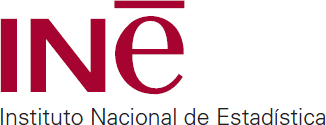

In [7]:
from IPython.display import Image
from IPython.core.display import HTML
Image("./data/ine.gif")

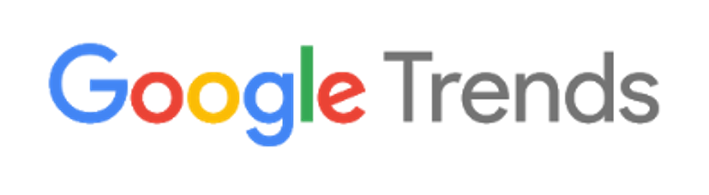

In [8]:
Image("./data/google.png")

In [9]:
from utils import *
from diccionaro_palabras import *
import datetime
import pandas as pd
import time
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 100})
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\gpierobon\Documents\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\gpierobon\Documents\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
# Extraer nuevos datos de Google?
extract_config = True

In [11]:
# Generar gráficos de análisis?
graficos_config = True

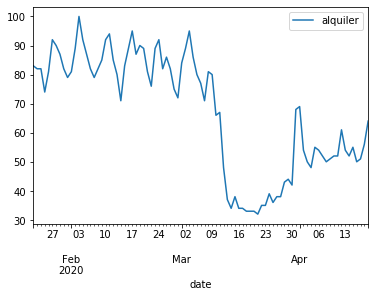

In [12]:
trending_topic_search('alquiler')

### Cargamos el diccionario de palabras

In [13]:
dict_palabras = diccionario_palabras(print_palabras = False)

Diccionario cargado!
Cantidad de palabras en el diccionario: 97



### Ejemplo de extracción de datos de tendencia de Google

In [14]:
# topic = 'alquiler'
# trending_topic_search(topic)
# trending_topic_search_long(topic)

# Datos del PIB del INE

### Importar datos de INE
#### PIB

In [15]:
df = pd.read_excel('./data/datos.xlsx', parse_dates=['Fecha'])
print('Rubros del PIB de España:')
for i in list(df['Categoría'].unique()):
    print(i)
    
df = pd.read_excel('./data/datos.xlsx', parse_dates=['Fecha'])[['Rubro','Fecha','EUR']]
df.columns = ['Rubro','date','value']
df.index = df.date
df = df[['Rubro','date','value']]
df = df[df['date']>='2016-01-01']

Rubros del PIB de España:
Impuestos menos subvenciones sobre los productos
VABpb Agricultura, ganadería, silvicultura y pesca (A, CNAE 2009)
VABpb Construcción (F, CNAE 2009)
VABpb Industria (B-E, CNAE 2009)
VABpb Servicios. Actividades artísticas, recreativas y otros servicios (R-T, CNAE 2009)
VABpb Servicios. Actividades financieras y de seguros (K, CNAE 2009)
VABpb Servicios. Actividades inmobiliarias (L, CNAE 2009)
VABpb Servicios. Actividades profesionales, científicas y técnicas y otras (M-N, CNAE 2009)
VABpb Servicios. Administración pública, educación y sanidad (O-Q, CNAE 2009)
VABpb Servicios. Comercio, transporte y hostelería (G-I, CNAE 2009)
VABpb Servicios. Información y comunicaciones (J, CNAE 2009)


### Rubros del PIB

### Gráfico de la serie temporal de cada Rubro (trimestral)

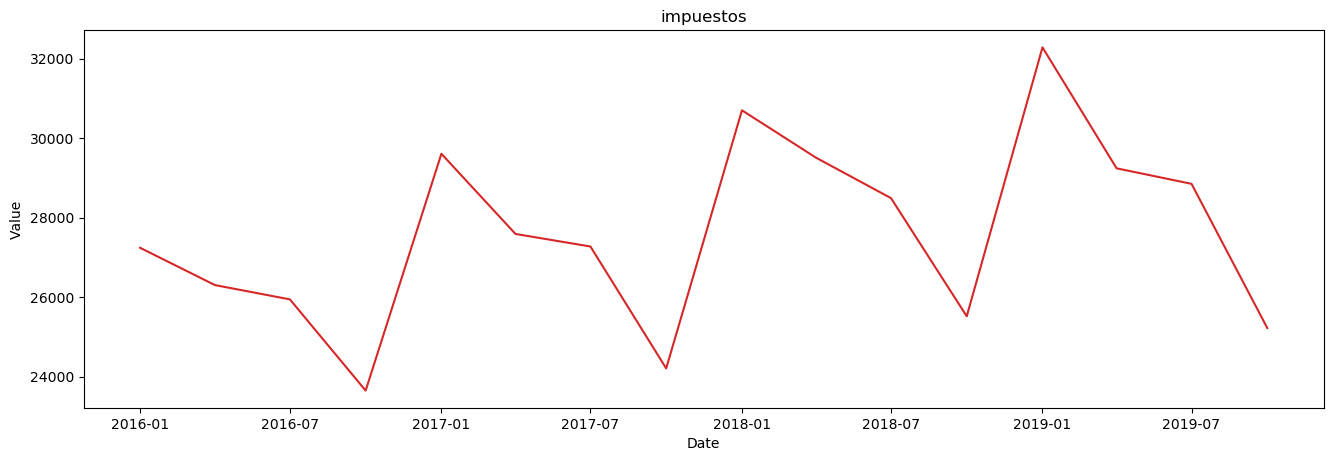

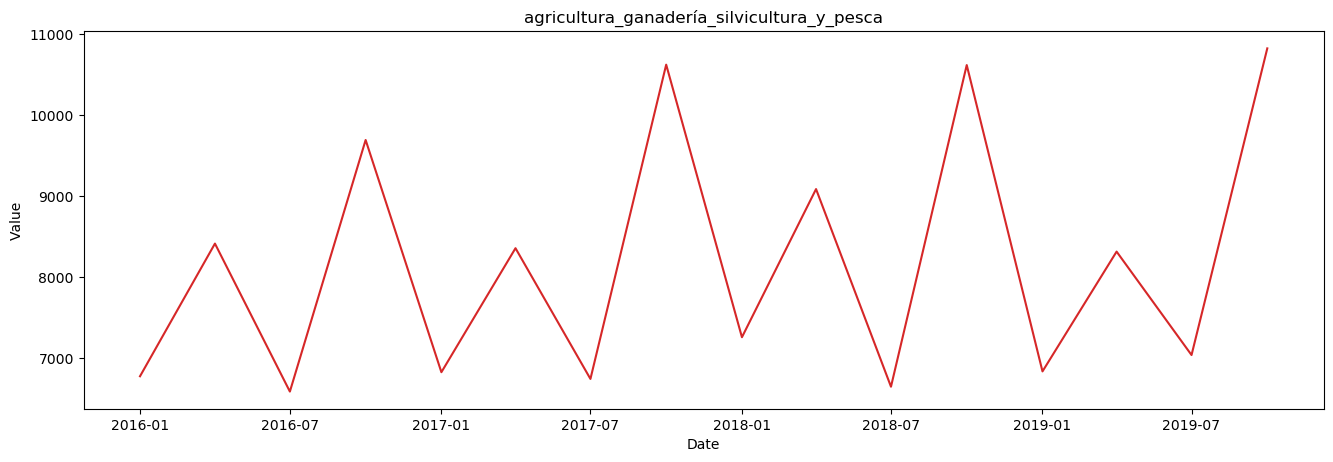

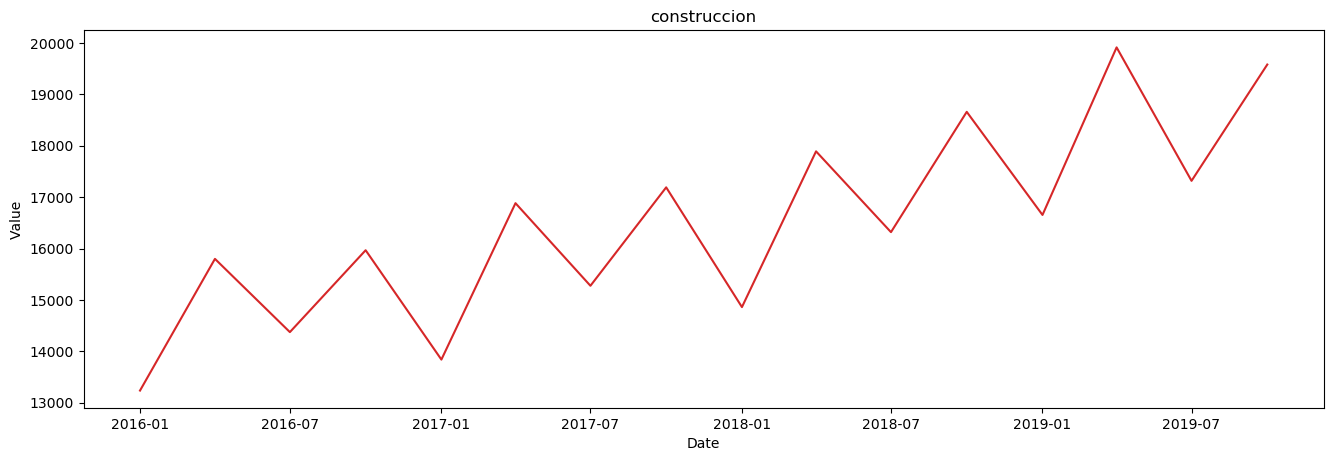

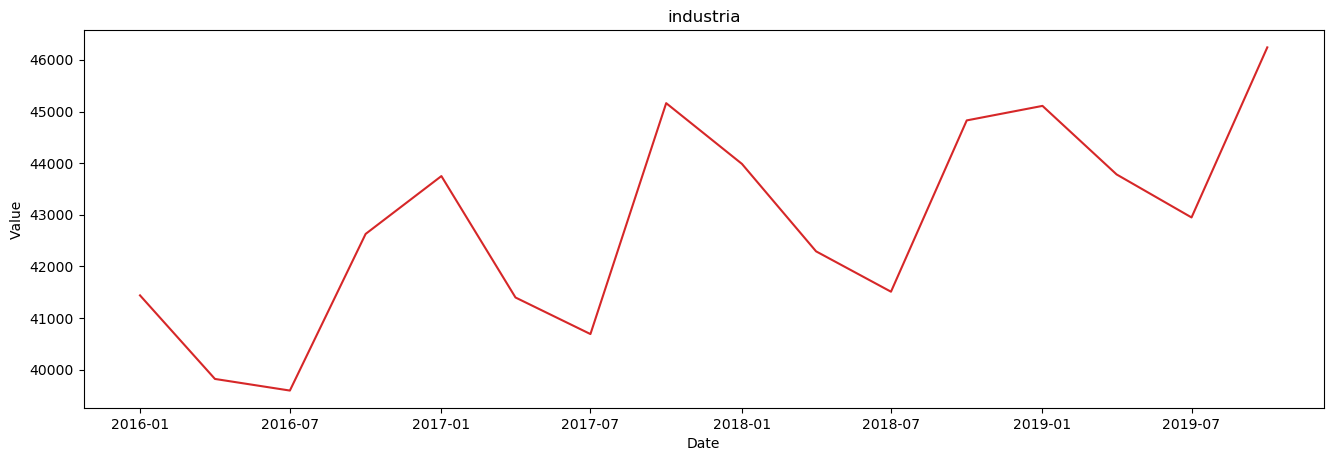

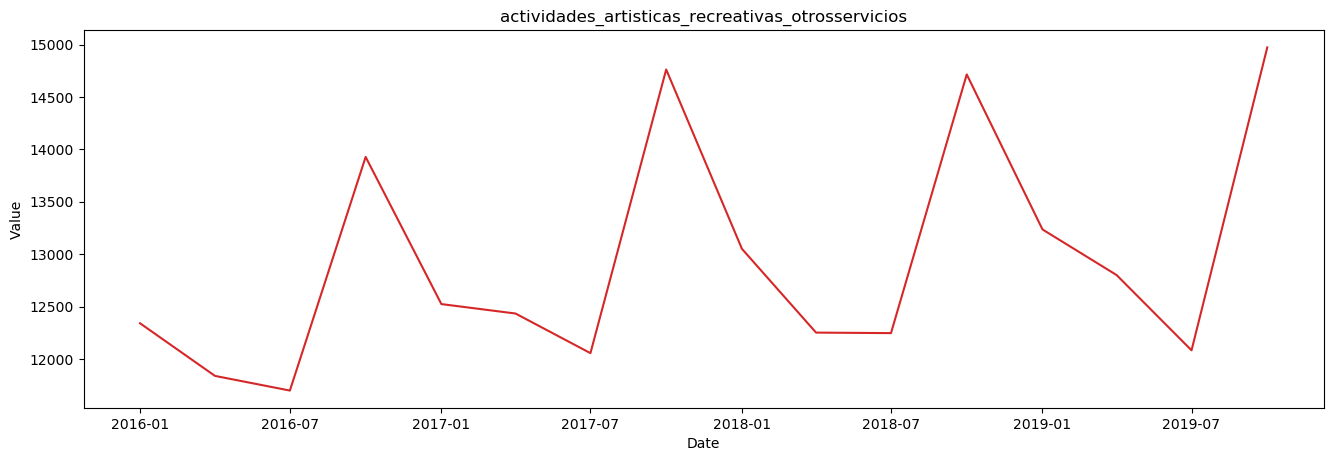

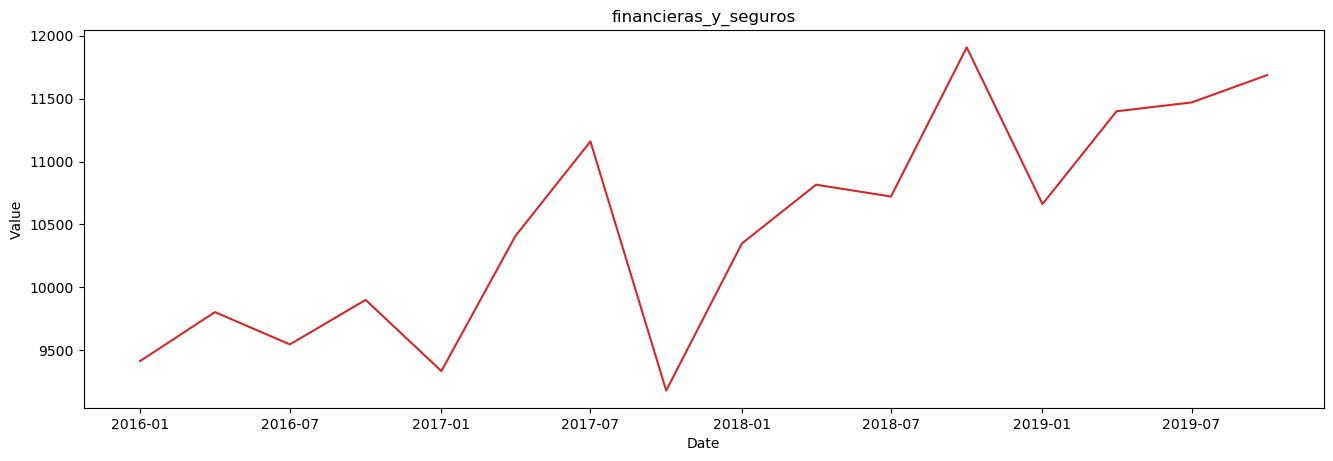

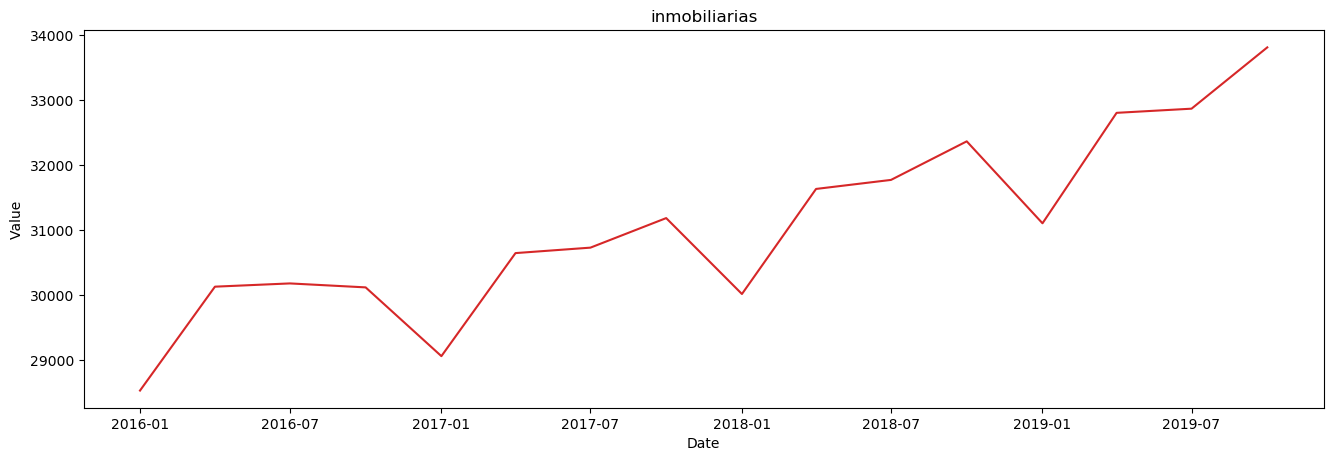

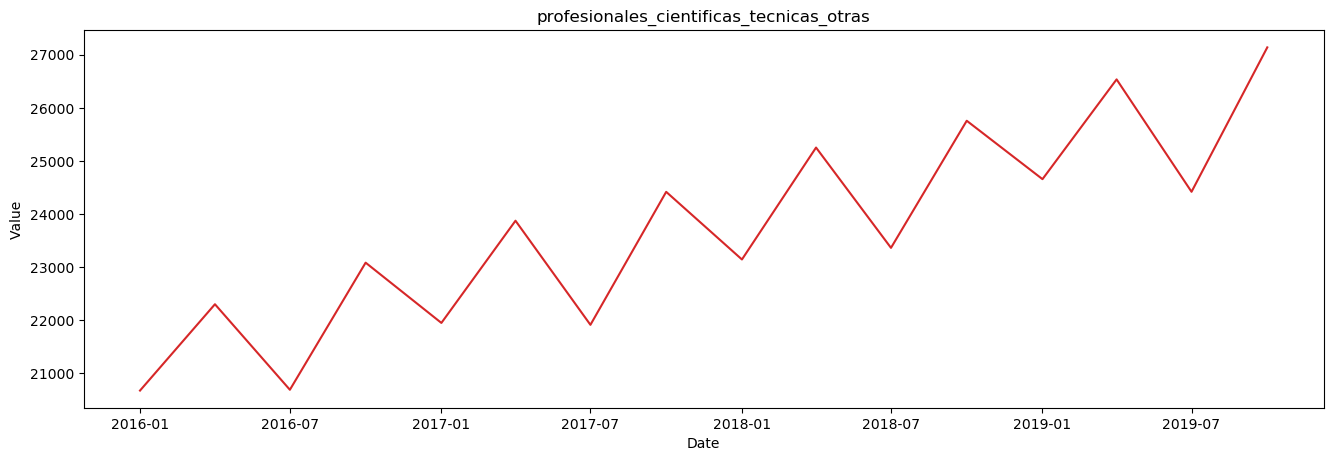

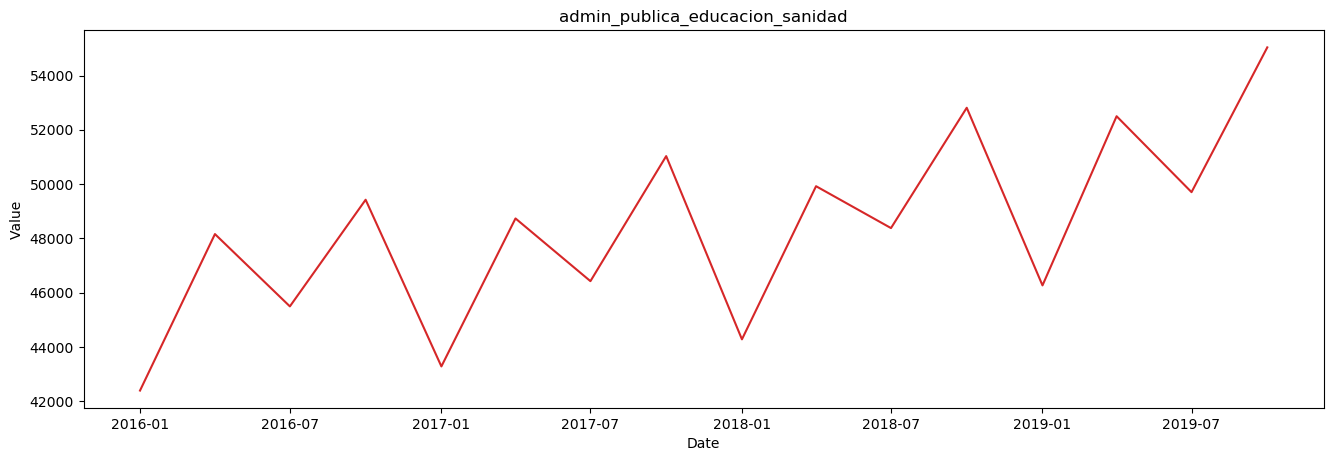

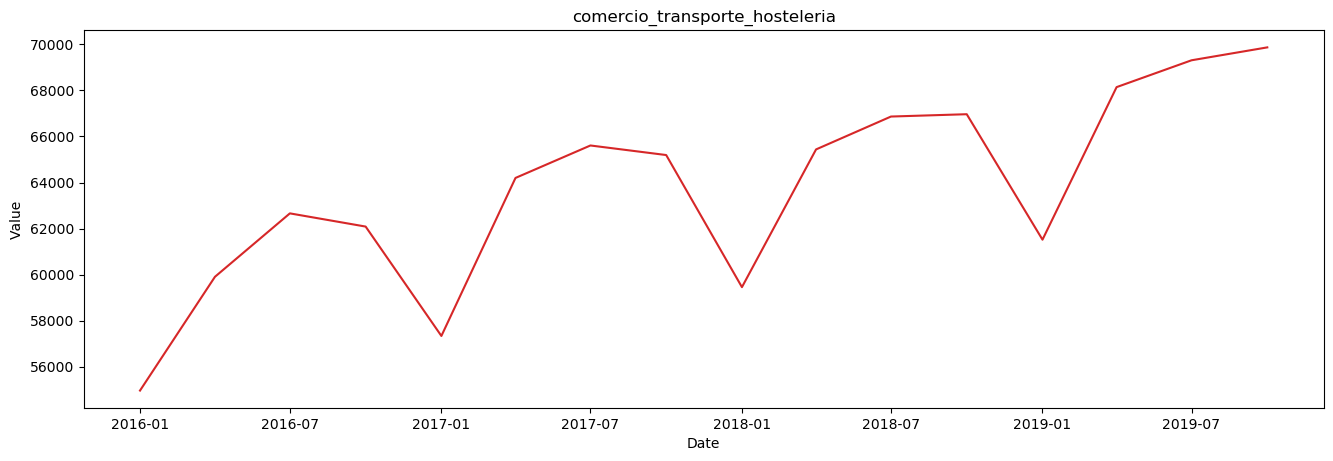

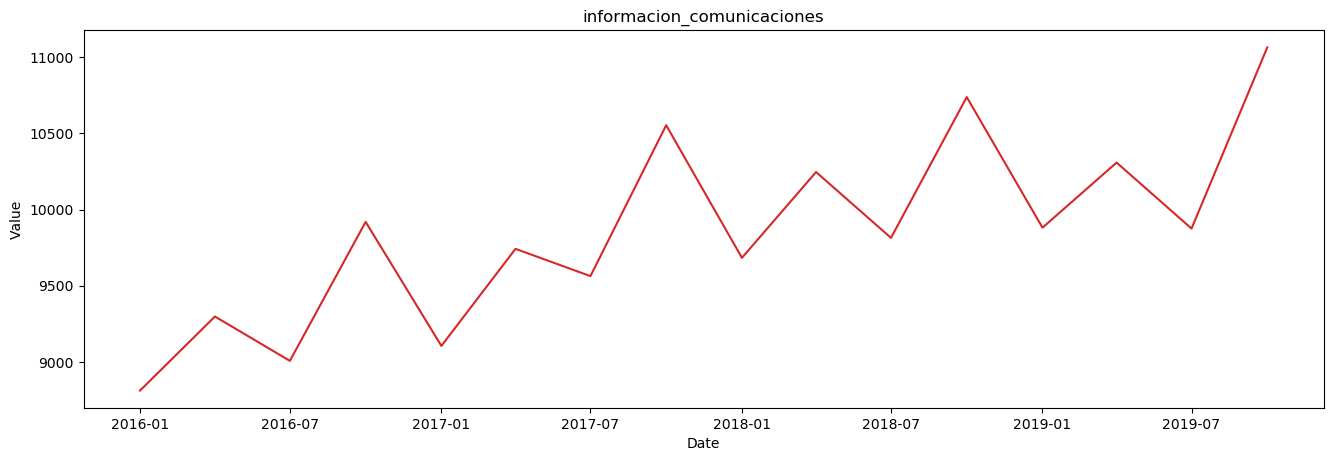

In [16]:
if graficos_config==True:
    for i in list(df.Rubro.unique()):
        plot_sectores_raw(df, i) 

### Análisis Estacional

In [17]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()
df = df.sort_index()

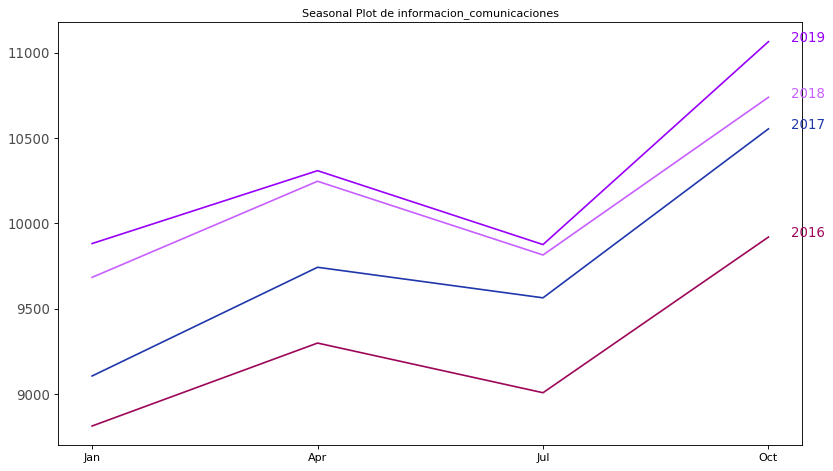

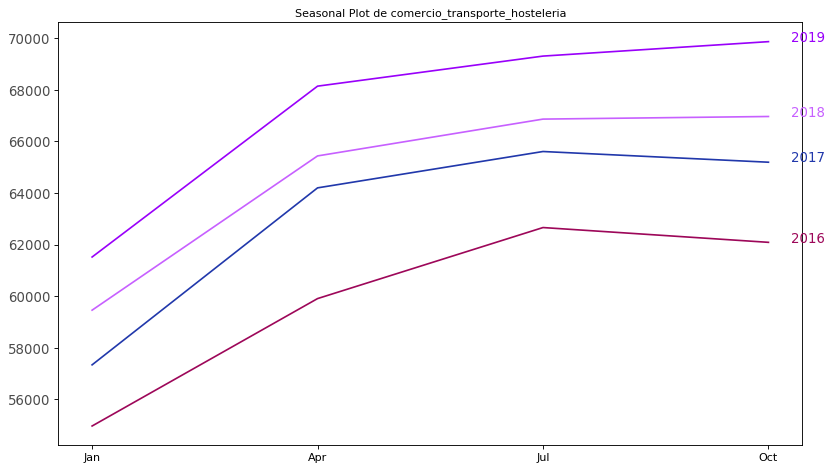

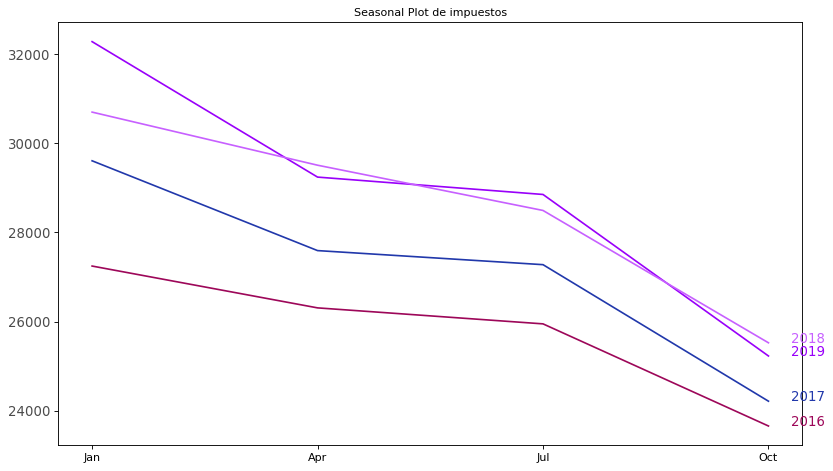

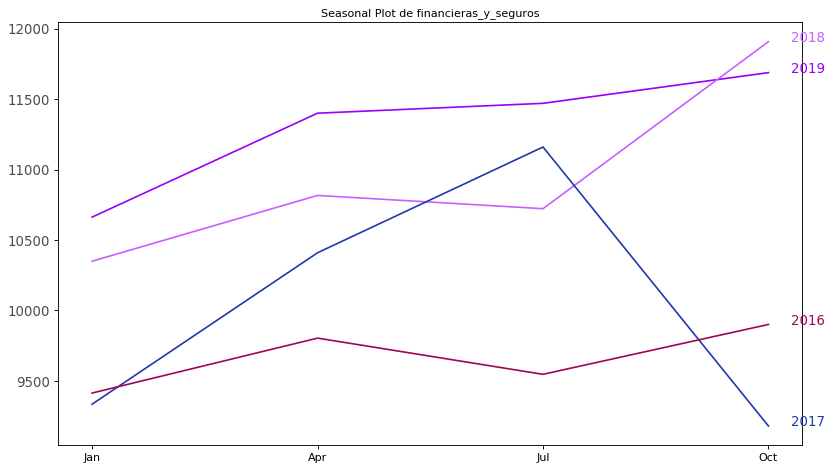

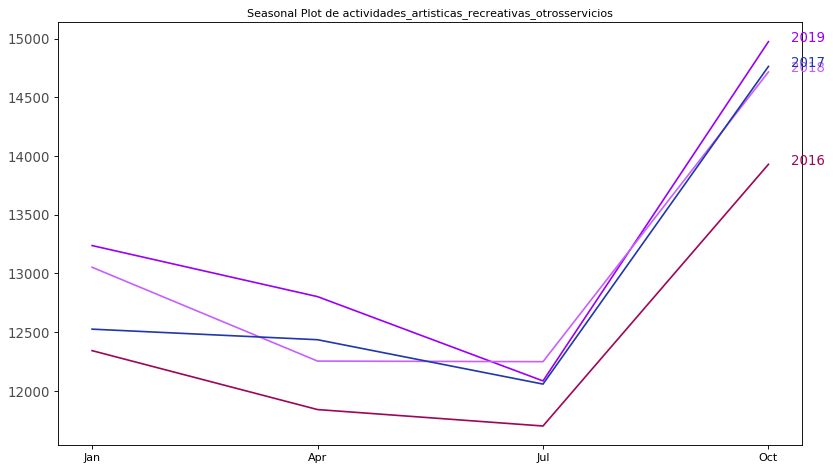

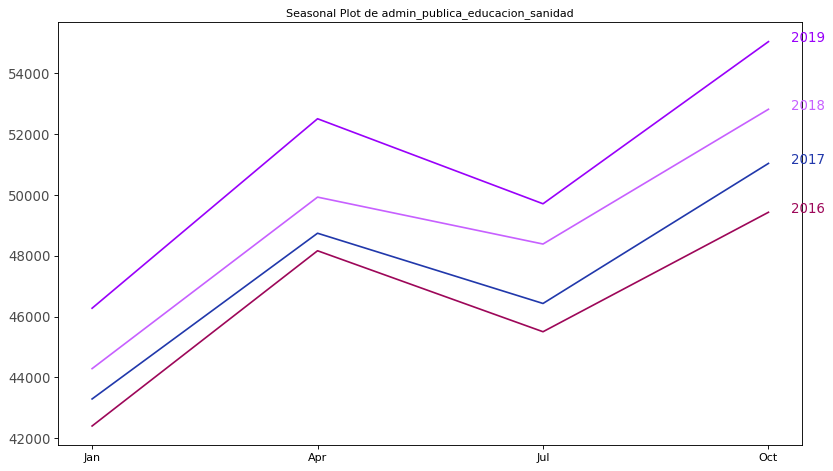

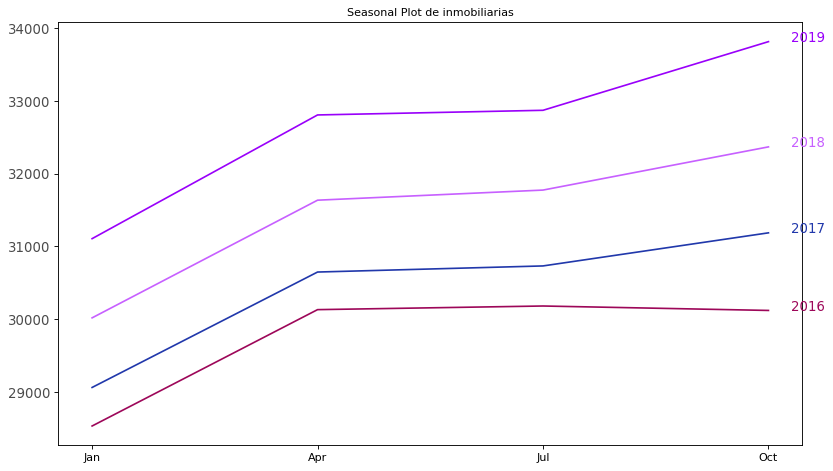

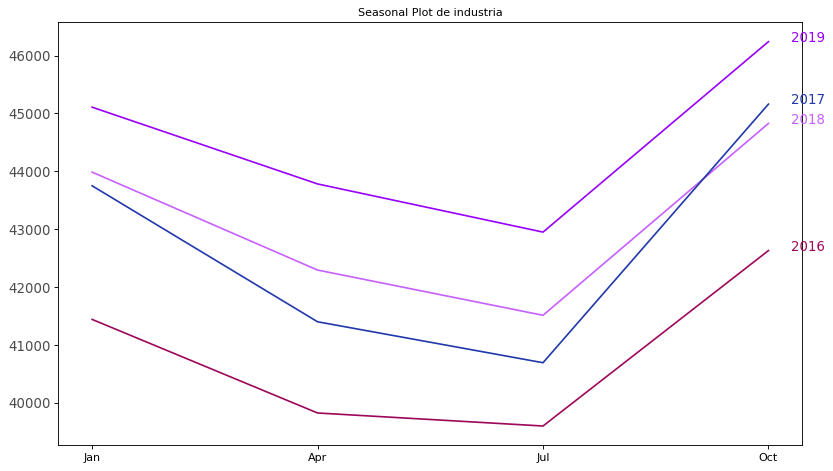

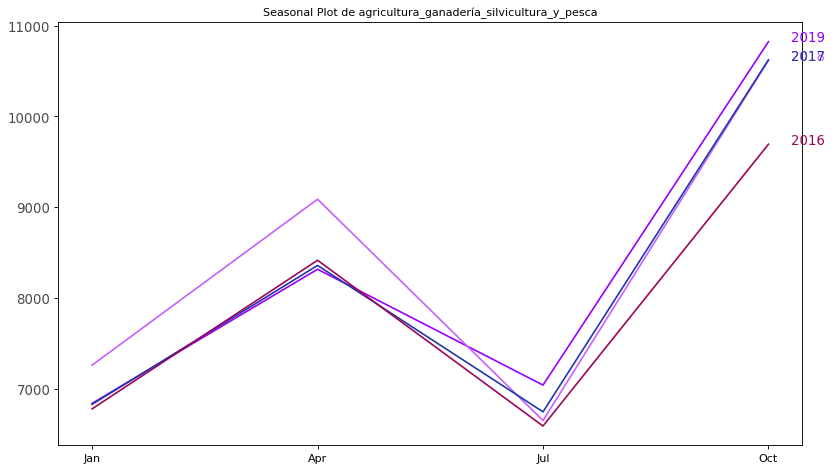

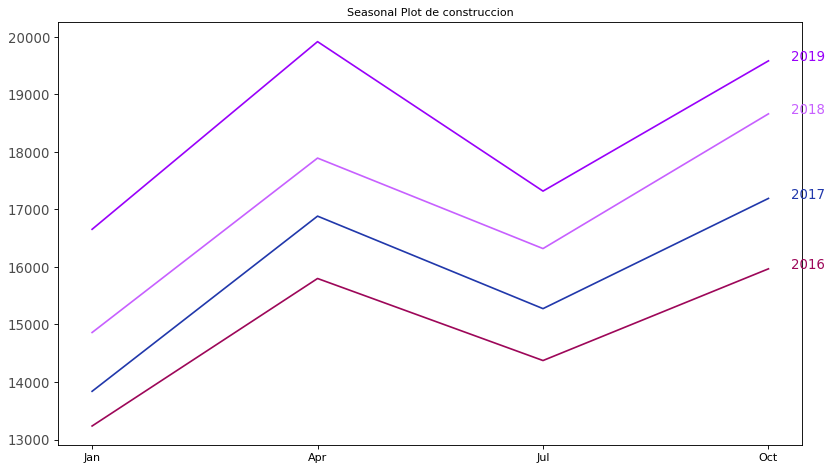

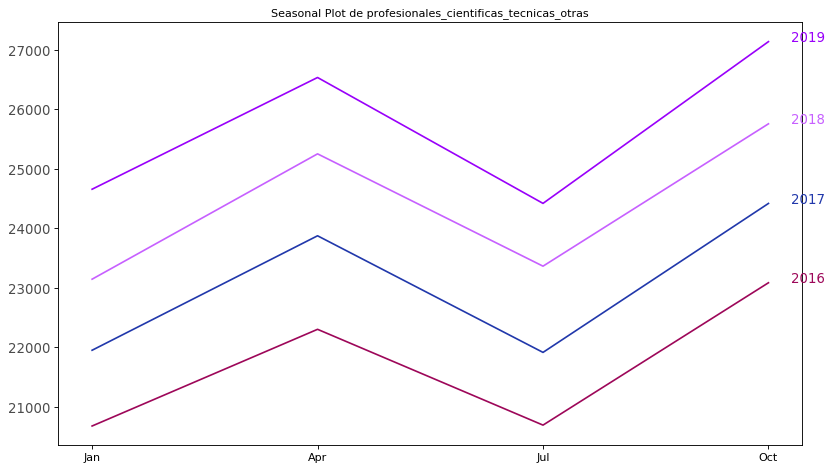

In [18]:
if graficos_config==True:
    for i in list(df.Rubro.unique()):
        draw_seasonal_plot(df, i, years)

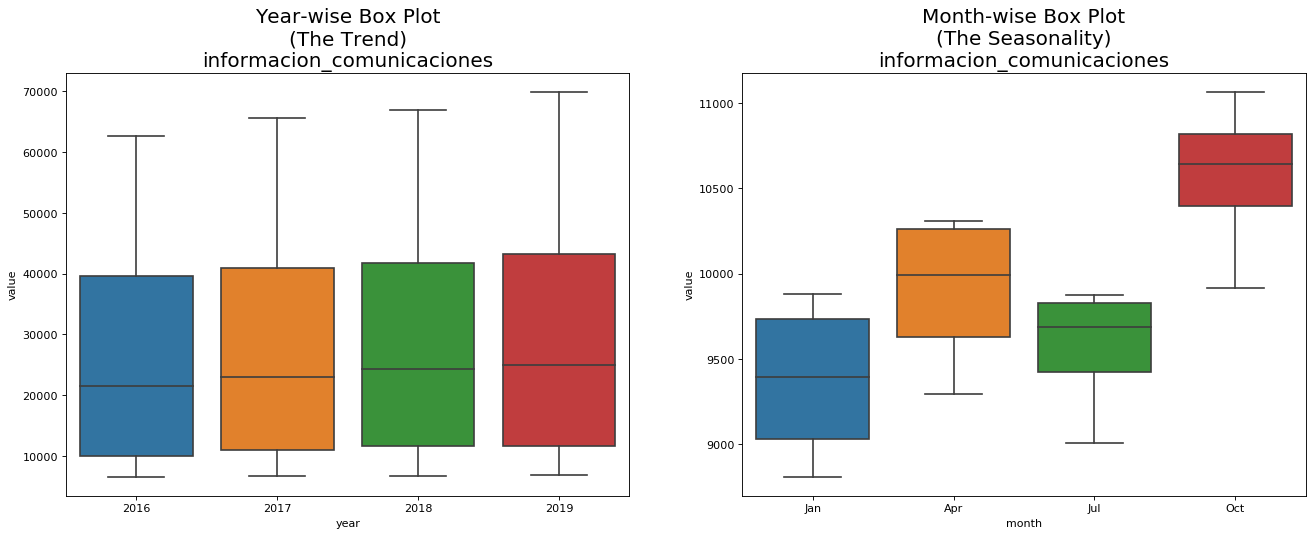

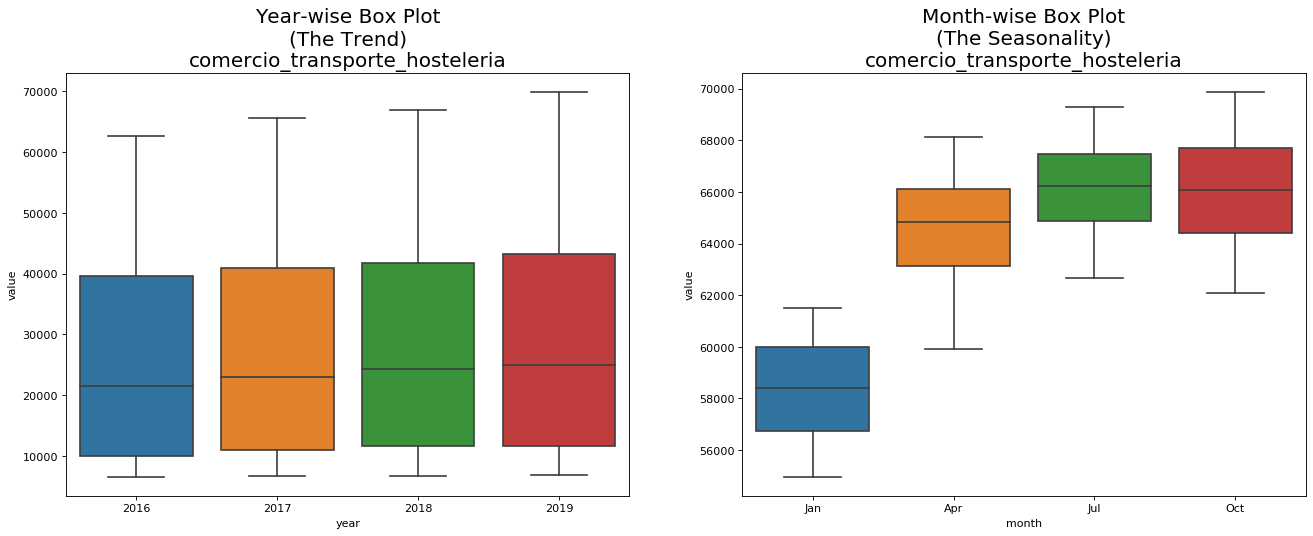

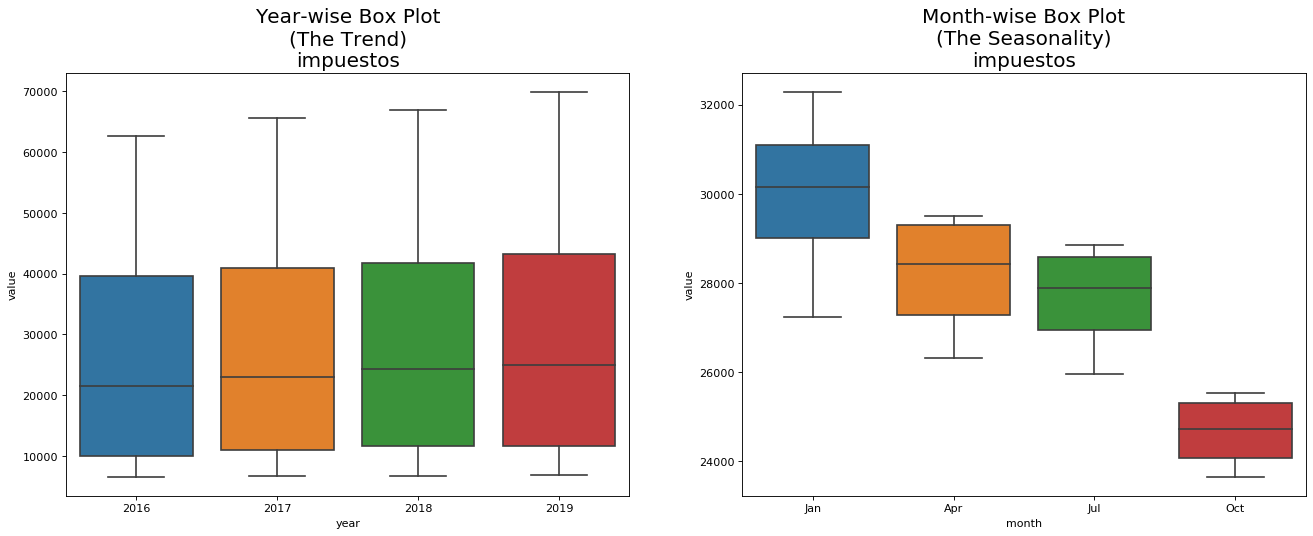

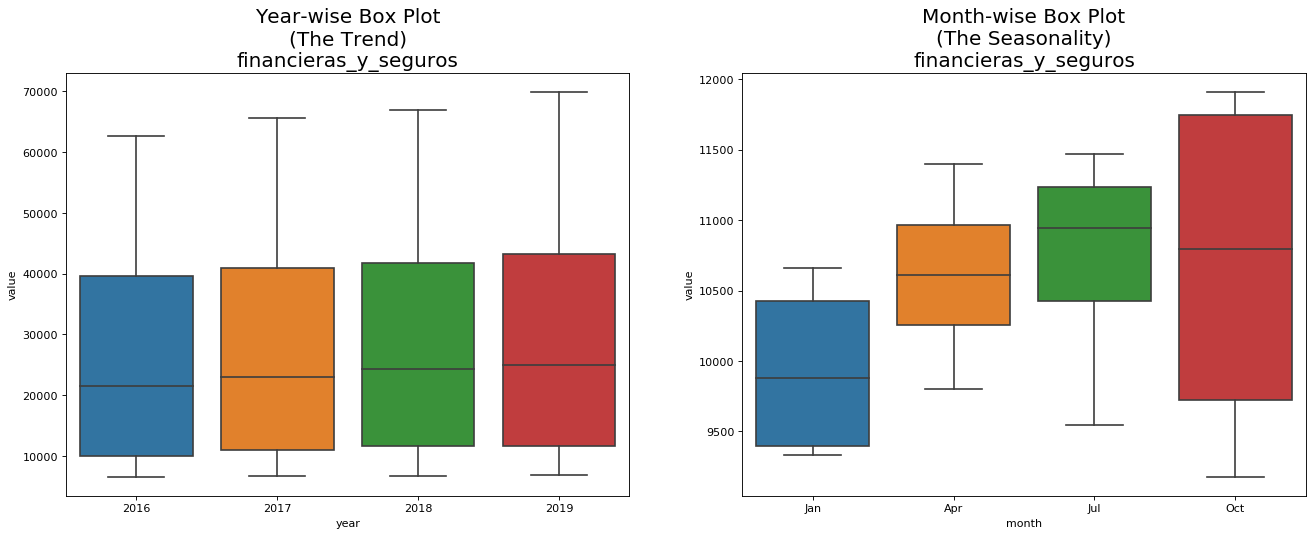

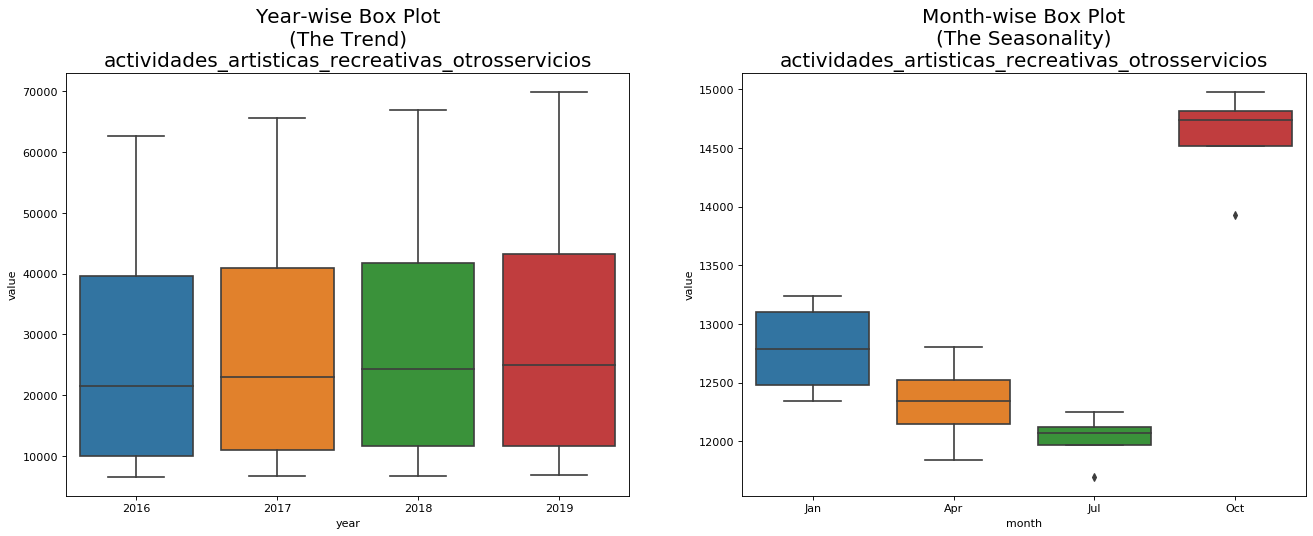

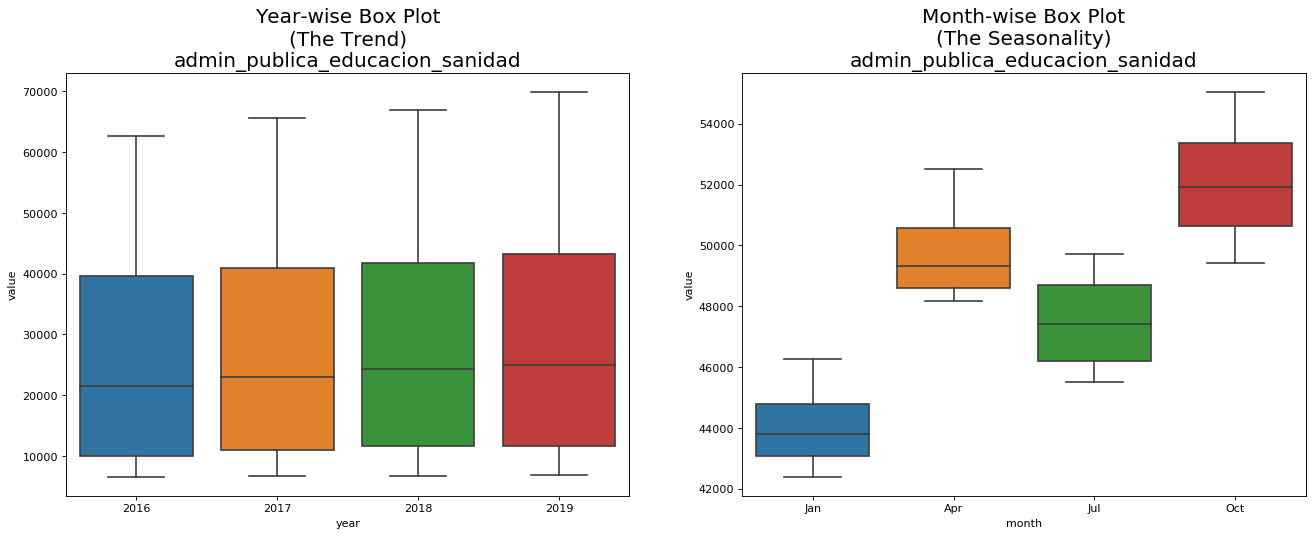

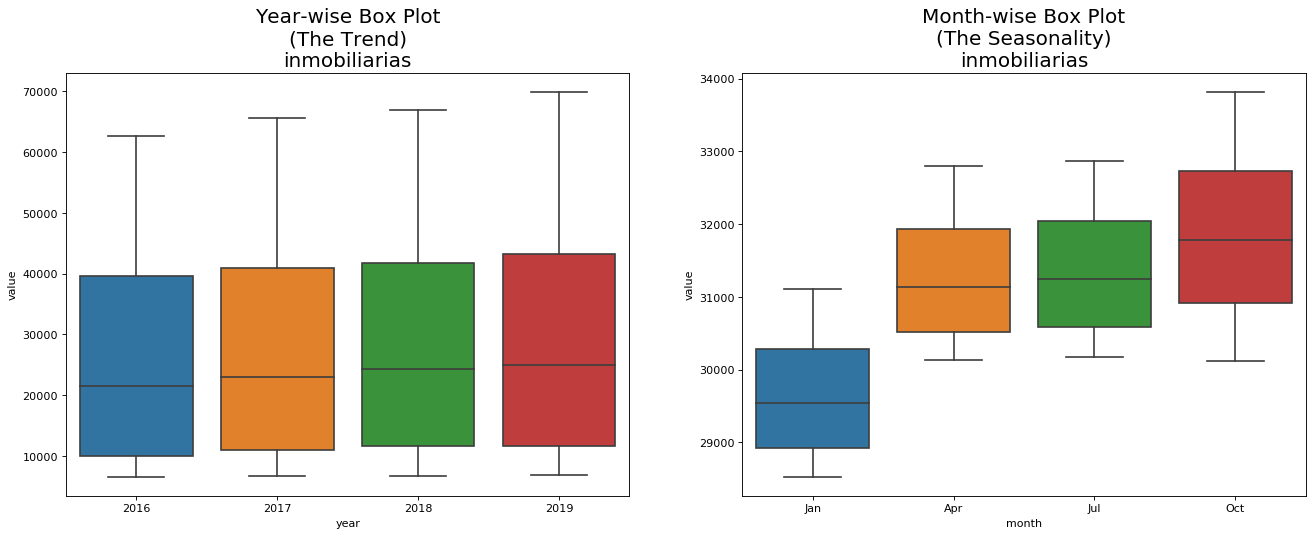

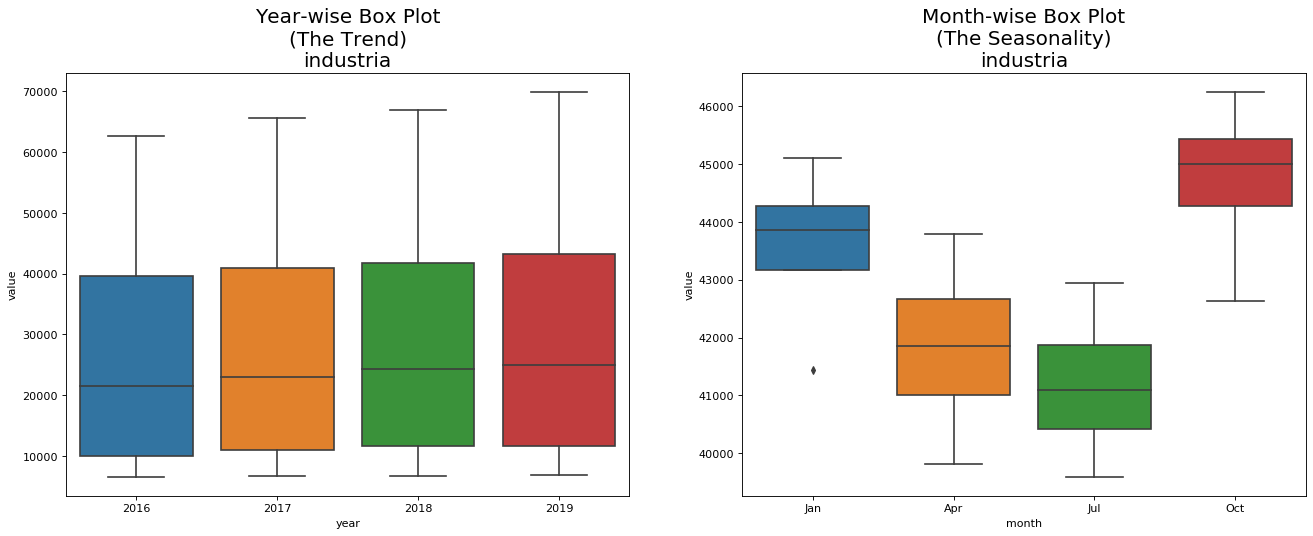

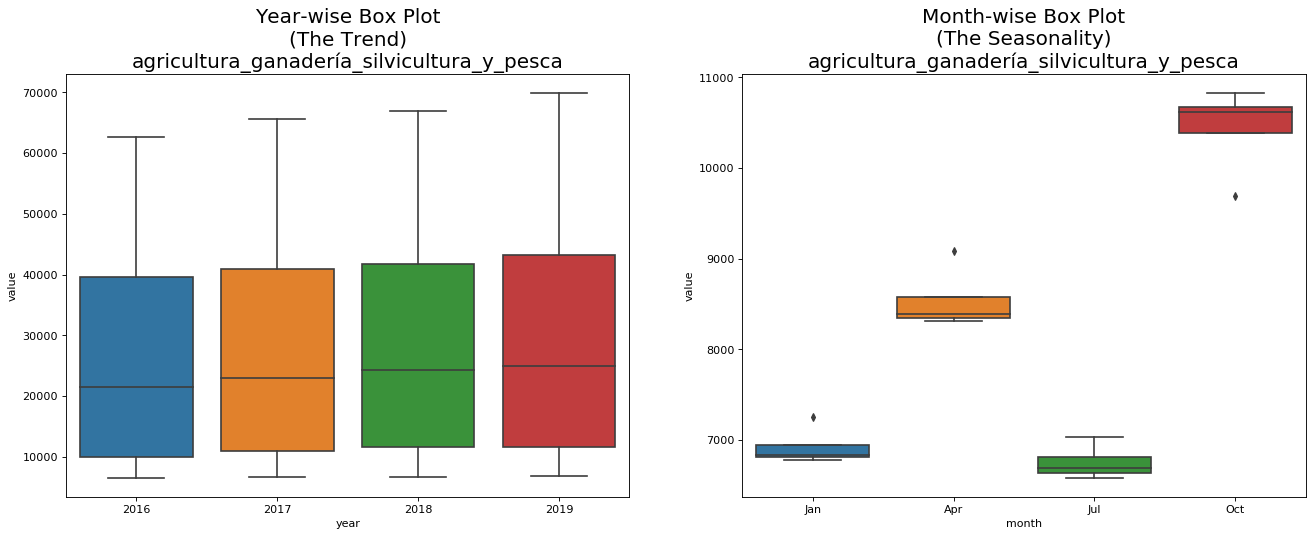

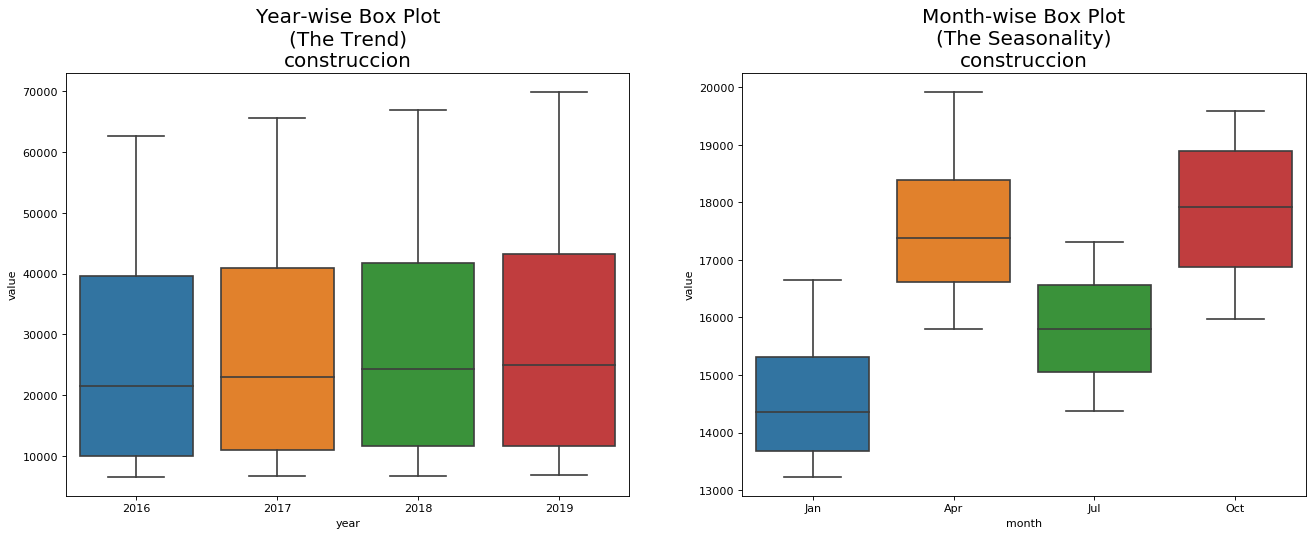

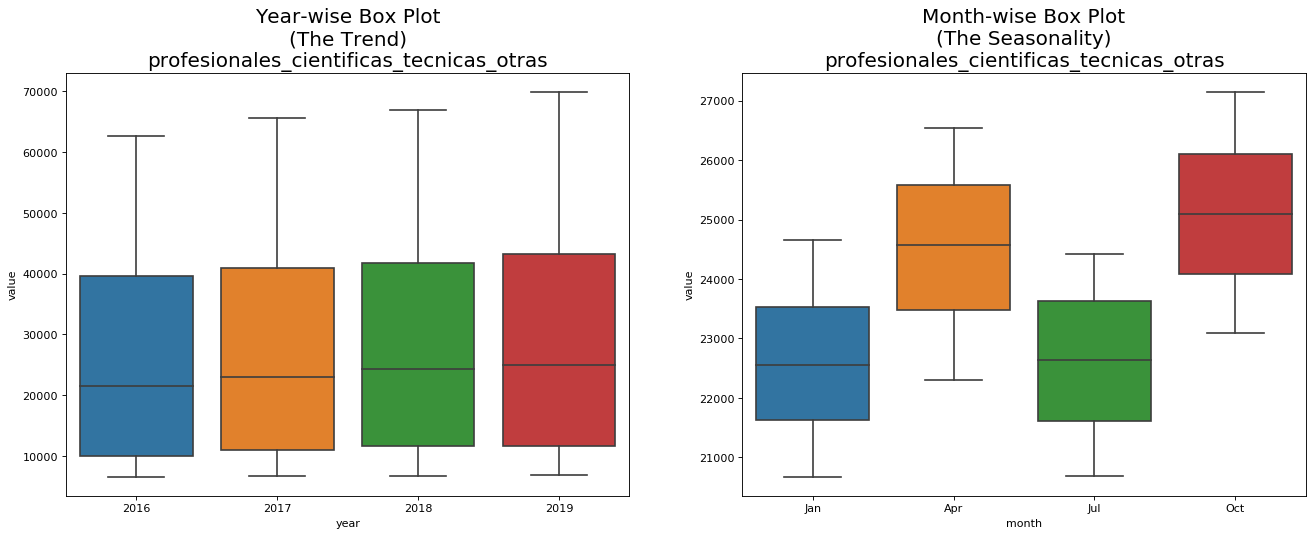

In [19]:
if graficos_config==True:
    for i in list(df.Rubro.unique()):
        draw_boxplots(df, i)

### Descomposición de la serie en factores Tendendia, Estacionalidad, Residuo
#### Aditiva y Multiplicativa

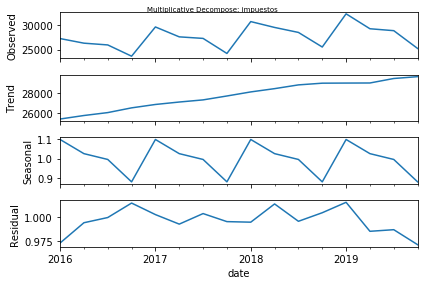

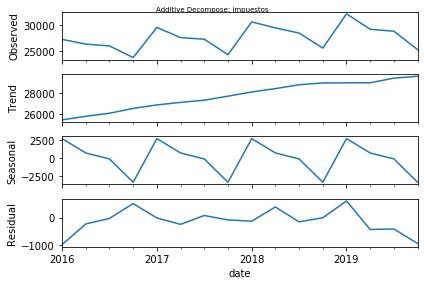

In [20]:
if graficos_config==True:
    df_mult, df_add = decomposition_plot(df,'impuestos')

# Predicción de todos los Rubros y generación de PIB

### Ponderación para cada Rubro

Cada rubro está compuesto por diferentes actividades según lo detalla la CNAE.

Nuestro objetivo es abrir el Rubro en las actividades más importantes y luego buscar las palabras clave de cada actividad para conseguir los regresores

Cargamos nuestro dataset construido con la información del INE:

In [21]:
porcentajes = pd.read_csv('./data/porcentajes.csv', delimiter=";", encoding="latin-1")[['Rubro','Actividad','porc_categoria']]

# Ciclo 1
* Solo se utilizan datos externos en los sectores que tienen la variable `use_external = True`
* Las que tengan `use_external = False` no utilizan ningún dato externo, es decir su predicción `origina` y `ajustada` son iguales. Esto es, siempre y cuando `ciclo = 1`

### 1. Información_comunicaciones

VABpb Servicios. Información y comunicaciones (J, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 4); AIC=249.510, BIC=256.590, Fit time=0.972 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=

Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 1, 4); AIC=234.466, BIC=242.254, Fit time=3.185 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 0, 1, 4); AIC=237.836, BIC=244.917, Fit time=0.659 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(5, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 4); AIC=239.589, BIC=245.962, Fit time=2.340 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 1, 4); AIC=246.953, BIC=254.741, Fit time=2.315 seconds
Fit ARIMA:

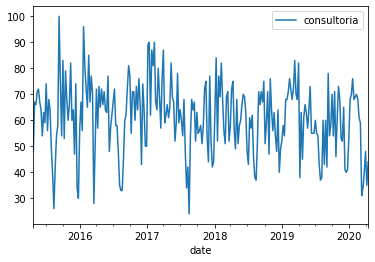

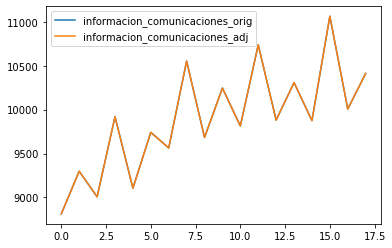

In [22]:
pred_info_comunic, trends_info_comunic = predict_rubro(df, 
                                                       'informacion_comunicaciones', dict_palabras, 
                                                       use_external=False, ciclo=1,
                                                       delay=0, trend='ct', extract=extract_config)

### 2. comercio_transporte_hosteleria
VABpb Servicios. Comercio, transporte y hostelería (G-I, CNAE 2009)

**Este rubro es el más importante de todo el PIB, ya que representa un 24% del total de la economía española**

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Trends Plot
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=296.669, BIC=306.713, Fit time=1.567 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=275.255, BIC=284.526, Fit time=2.347 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan sec

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=407.637, BIC=416.136, Fit time=1.636 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=300.465, BIC=308.191, Fit time=2.792 seconds
Fit ARIMA: order=(2, 0, 3) sea

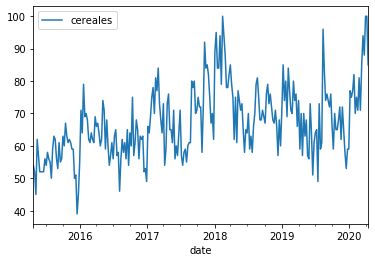

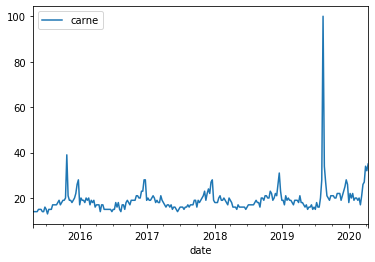

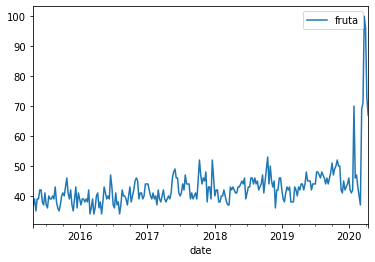

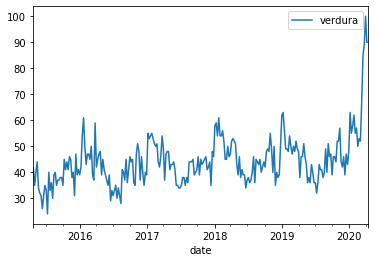

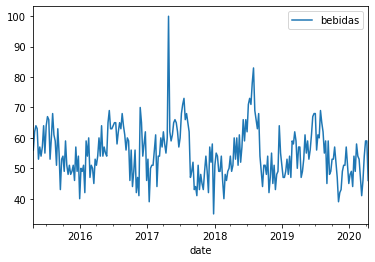

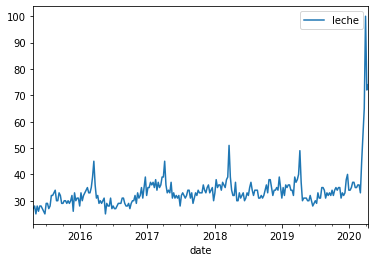

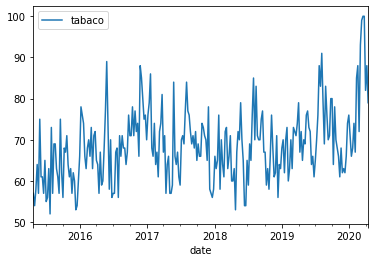

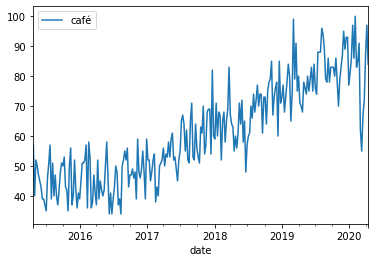

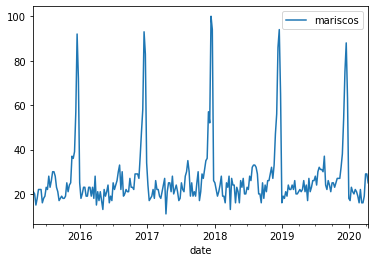

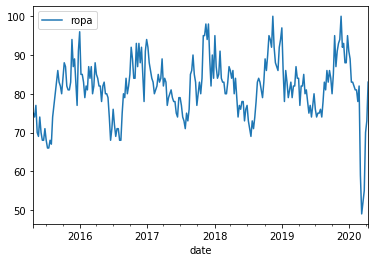

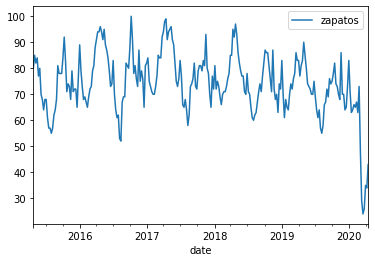

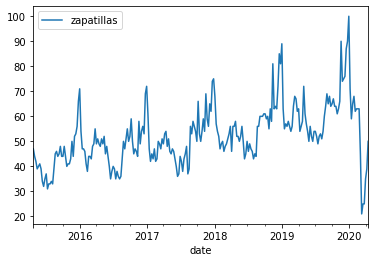

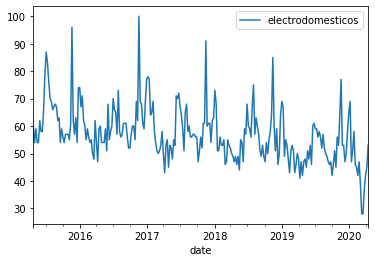

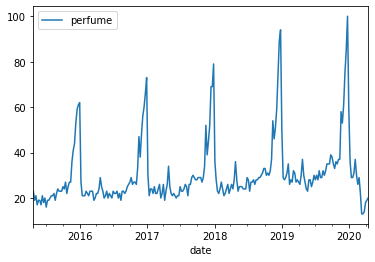

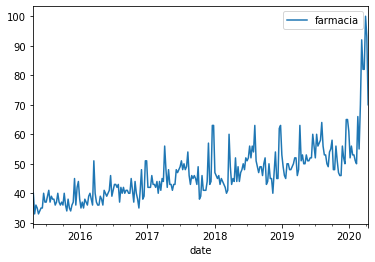

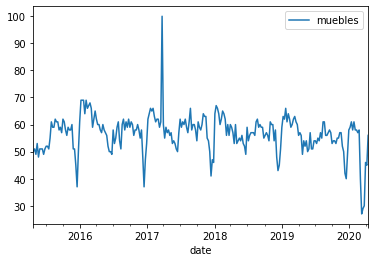

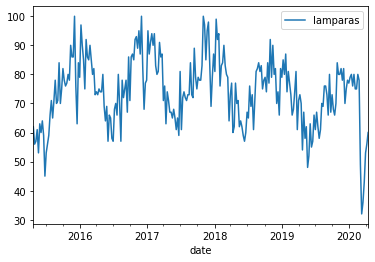

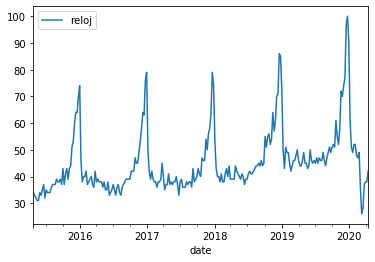

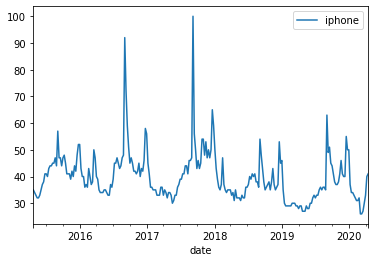

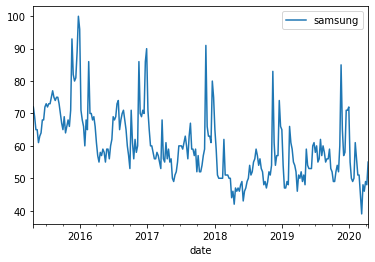

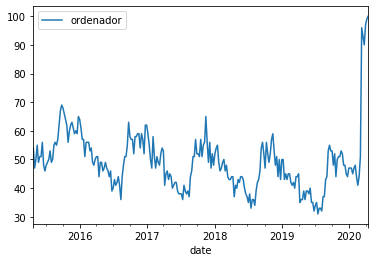

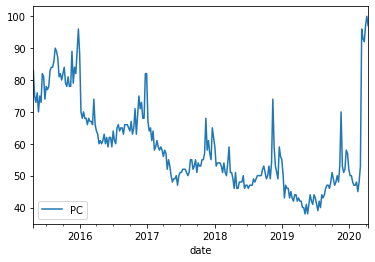

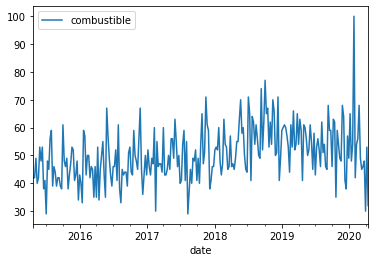

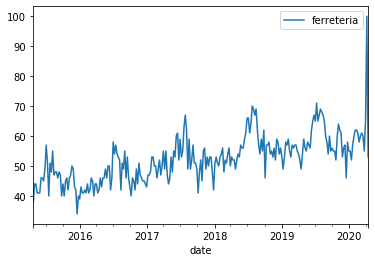

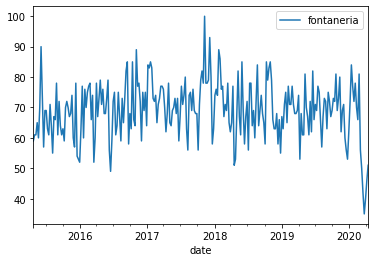

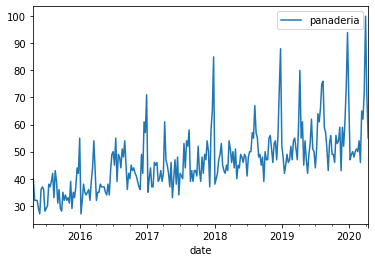

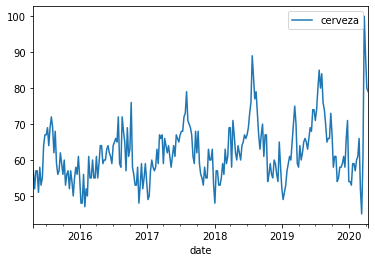

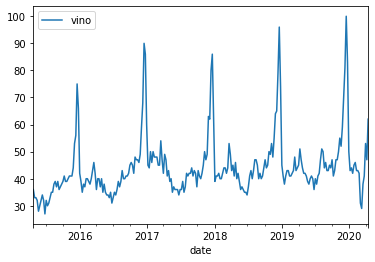

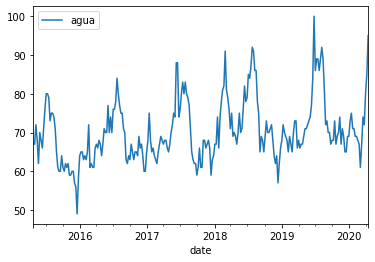

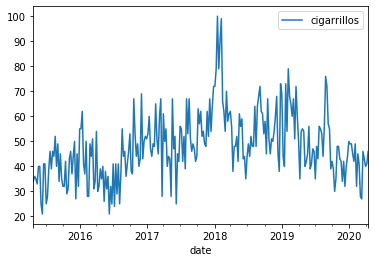

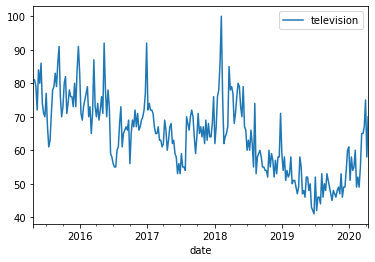

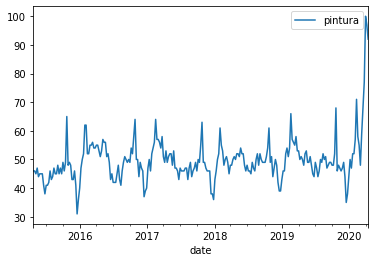

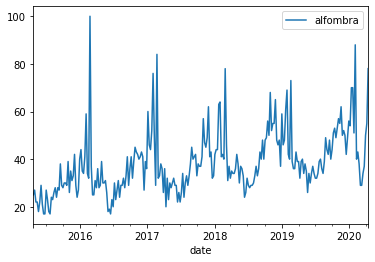

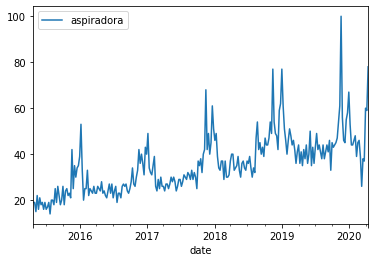

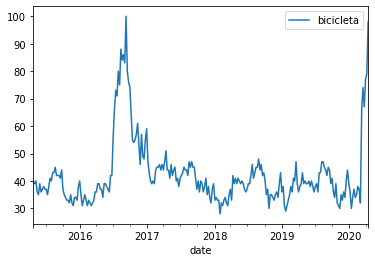

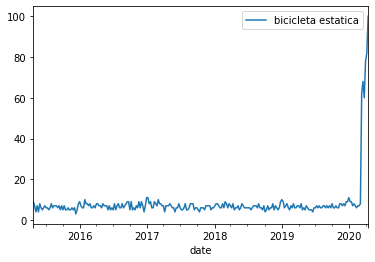

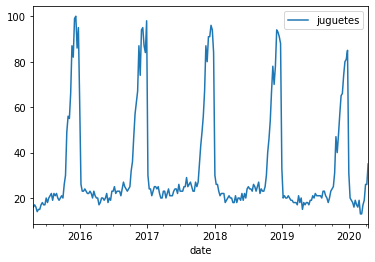

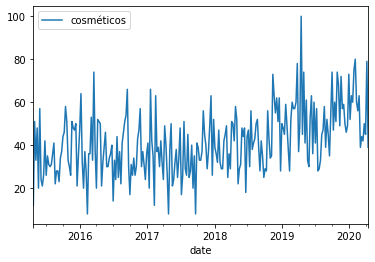

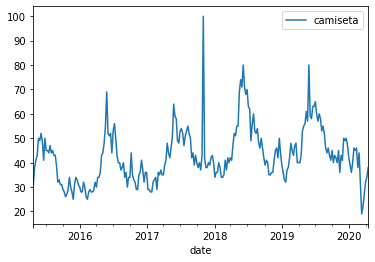

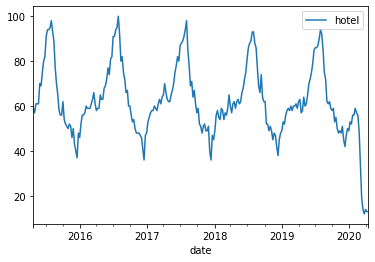

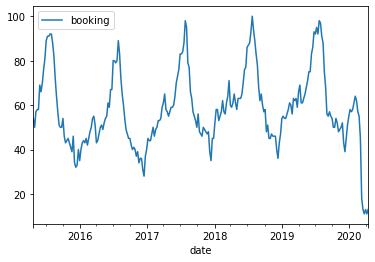

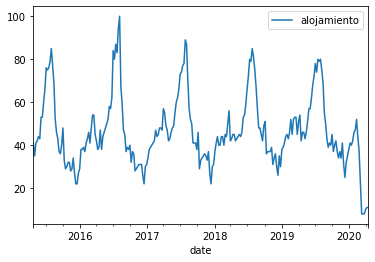

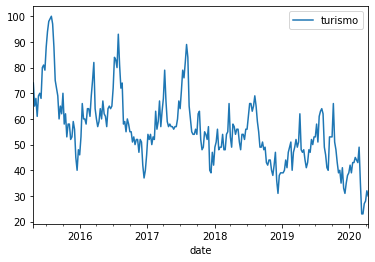

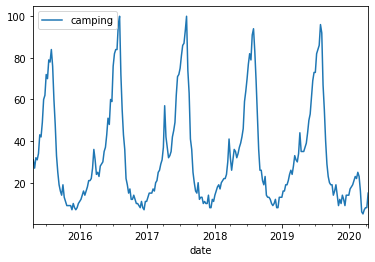

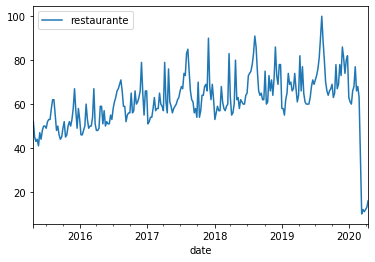

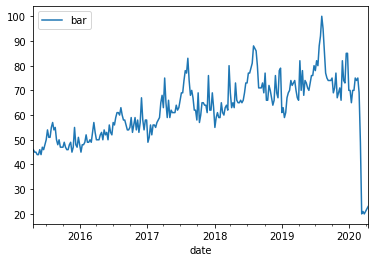

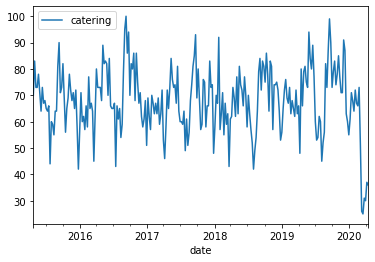

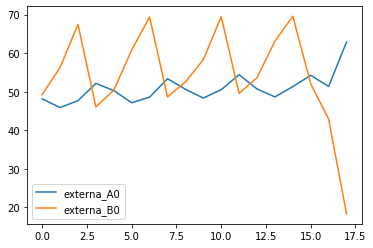

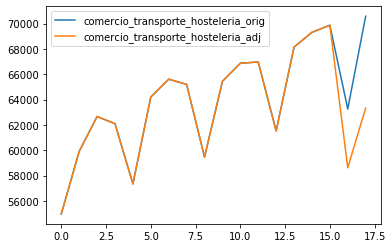

In [24]:
pred_comerc_hotel, trends_comerc_hotel = predict_rubro(df,
                                                       'comercio_transporte_hosteleria', dict_palabras, 
                                                       use_external=True, ciclo=1,
                                                       delay=0, trend='ct', extract=extract_config)

### 3. financieras_y_seguros
VABpb Servicios. Actividades financieras y de seguros (K, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 3, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.021 seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(2, 0, 1, 4); AIC=352.541, BIC=358.190, Fit time=0.697 seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: orde

Fit ARIMA: order=(3, 3, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 2) seasonal_order=(2, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.048 seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 2) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.030 seconds
Fit ARIMA: order=(2, 3, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.038 seconds
Fit ARIMA: order=(3, 3, 2) seasonal_order=(2, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(5

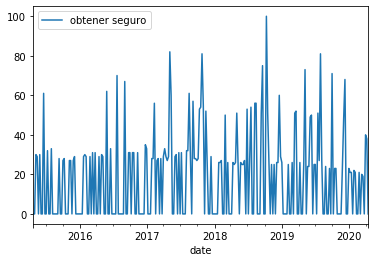

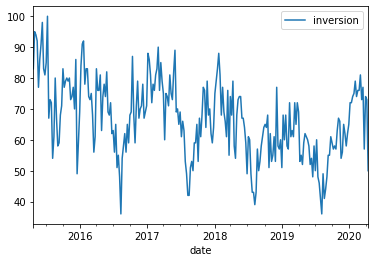

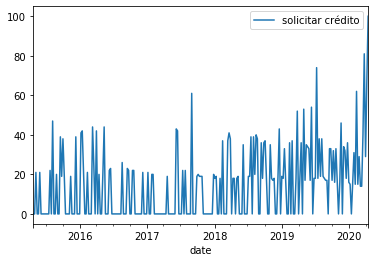

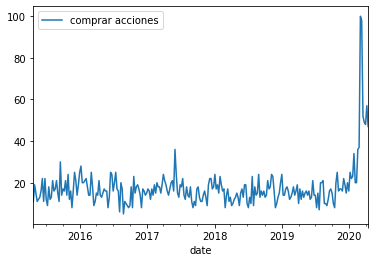

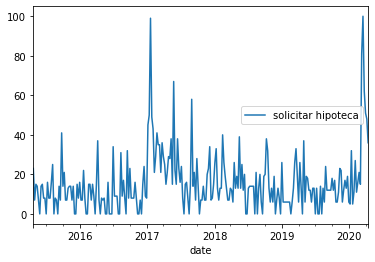

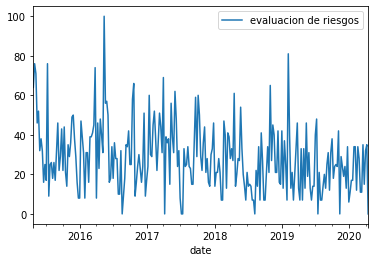

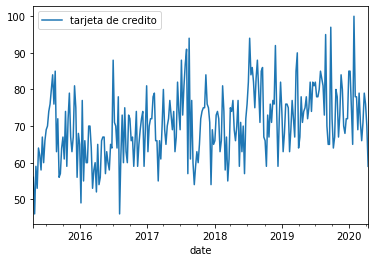

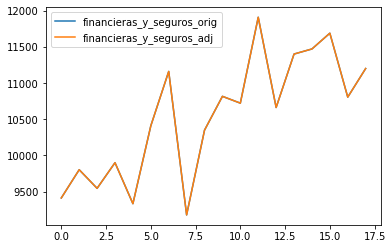

In [25]:
pred_financieras, trends_financieras = predict_rubro(df, 
                                                     'financieras_y_seguros', dict_palabras, 
                                                     use_external=False, ciclo=1,
                                                     delay=0 , trend='ct', extract=extract_config)

### 4. actividades_artisticas_recreativas_otrosservicios
VABpb Servicios. Actividades artísticas, recreativas y otros servicios (R-T, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Trends Plot
Prediciendo con ajustes...
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 0, 1, 4); AIC=243.276, BIC=253.189, Fit time=4.409 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 4); AIC=262.442, BIC=271.646, Fit time=1.160 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan sec

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=315.755, BIC=325.799, Fit time=3.145 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=258.168, BIC=266.667, Fit time=2.712 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=256.277, BIC=264.003, Fit time=1.404 seconds
Fit ARIMA: order=(2,

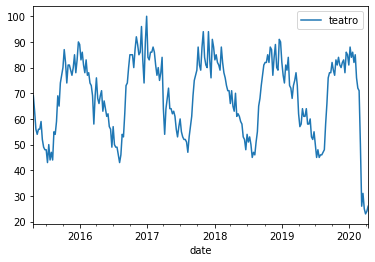

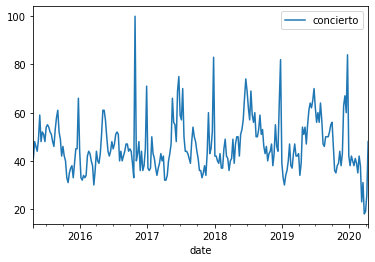

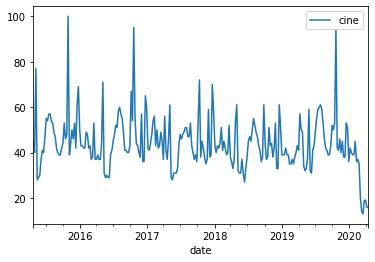

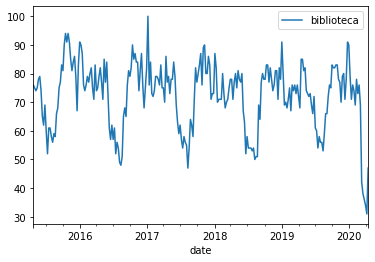

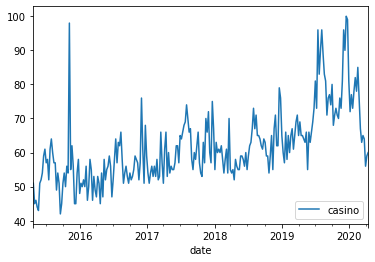

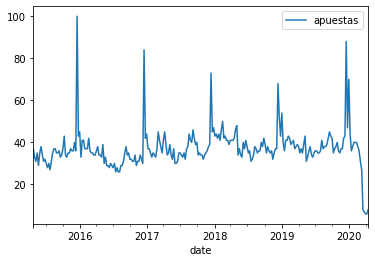

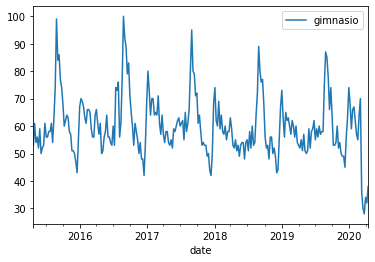

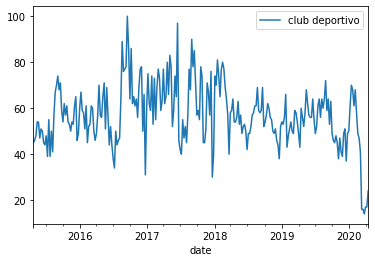

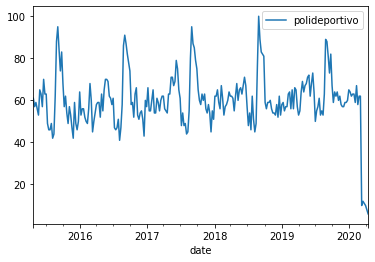

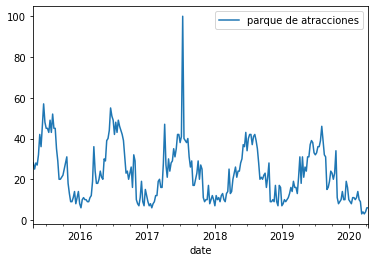

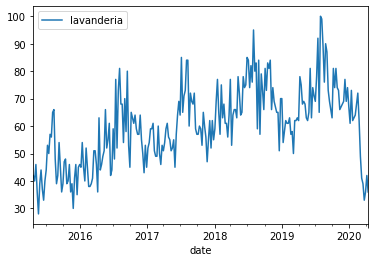

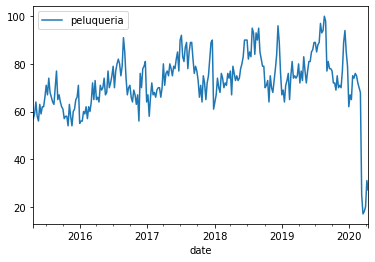

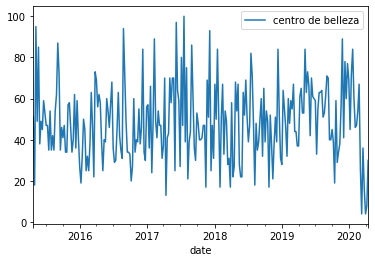

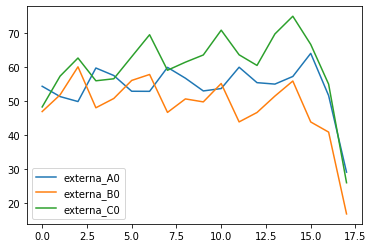

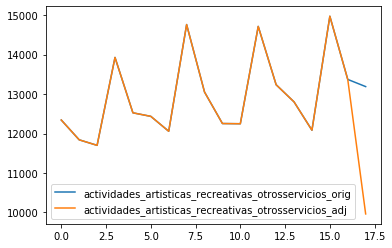

In [26]:
pred_recreativas, trends_recreativas = predict_rubro(df, 
                                                     'actividades_artisticas_recreativas_otrosservicios', dict_palabras,
                                                     use_external=True, ciclo=1,
                                                     delay=0, trend='ct', extract=extract_config)

### 5. admin_publica_educacion_sanidad
VABpb Servicios. Administración pública, educación y sanidad (O-Q, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=2767.918, BIC=2776.416, Fit time=1.735 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=293.347, BIC=301.073, Fit time=1.201 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit A

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=344.688, BIC=354.732, Fit time=2.345 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=275.199, BIC=283.697, Fit time=3.306 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=280.309, BIC=288.034, Fit time=1.764 seconds
Fit ARIMA: order=(2,

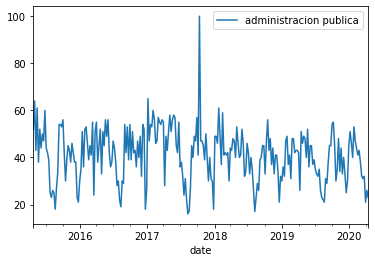

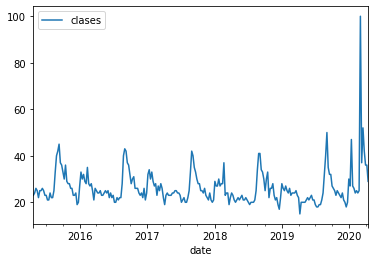

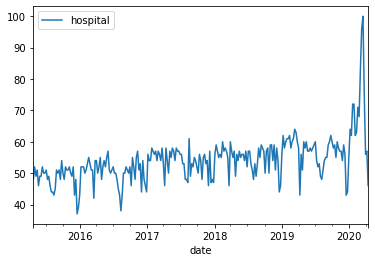

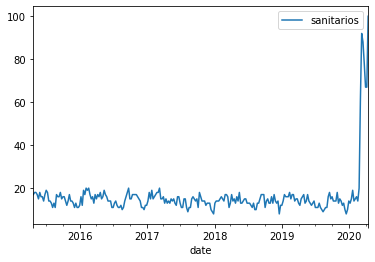

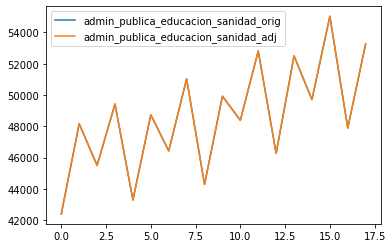

In [27]:
pred_publi_educ_sani, trends_publi_educ_sani = predict_rubro(df, 
                                                             'admin_publica_educacion_sanidad', dict_palabras,
                                                             use_external=False, ciclo=1,
                                                             delay=0, trend='ct', extract=extract_config)

### 6. inmobiliarias
VABpb Servicios. Actividades inmobiliarias (L, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Trends Plot
Prediciendo con ajustes...
Fit ARIMA: order=(3, 3, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(2, 0, 1, 4); AIC=247.165, BIC=253.380, Fit time=1.001 seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit A

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=344.139, BIC=354.183, Fit time=1.922 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=341.787, BIC=349.513, Fit time=1.450 seconds
Fit ARIMA: order=(2, 0, 3) sea

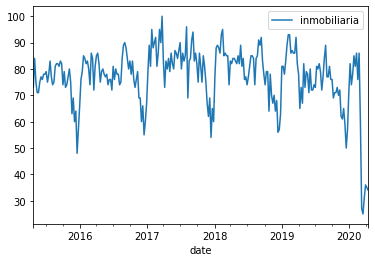

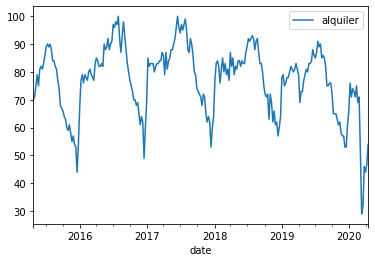

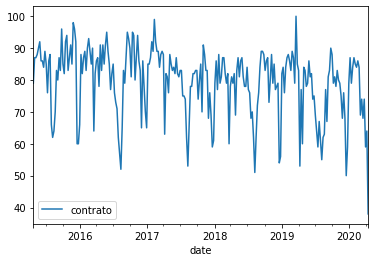

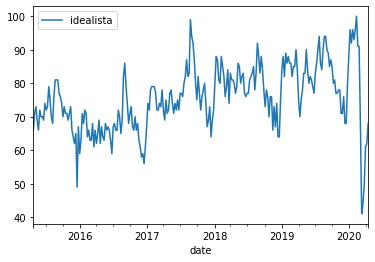

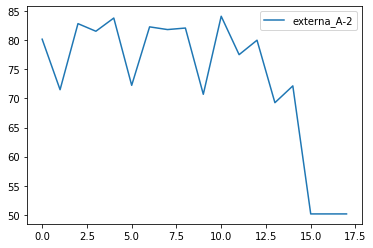

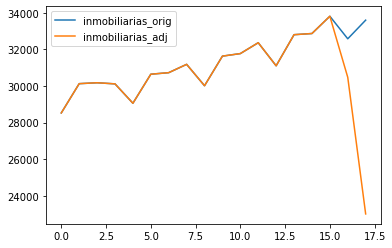

In [28]:
pred_inmobiliaria, trends_inmobiliaria = predict_rubro(df, 
                                                       'inmobiliarias', dict_palabras, 
                                                       use_external=True, ciclo=1,
                                                       delay=-2, trend='ct', extract=extract_config)

### 7. industria
VABpb Industria (B-E, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=1726.208, BIC=1734.707, Fit time=0.799 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=272.918, BIC=280.644, Fit time=0.755 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit A

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=318.289, BIC=328.332, Fit time=2.591 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=294.744, BIC=303.243, Fit time=0.653 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=289.082, BIC=296.808, Fit time=0.970 seconds
Fit ARIMA: order=(2,

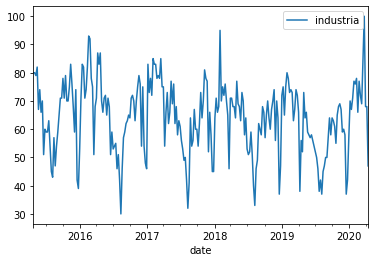

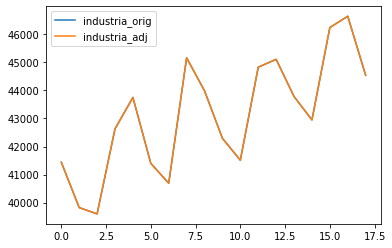

In [29]:
pred_industria, trends_industria = predict_rubro(df, 
                                                 'industria', dict_palabras, 
                                                 use_external=False, ciclo=1,
                                                 delay=0, trend='ct', extract=extract_config)

### 8. agricultura_ganadería_silvicultura_y_pesca
VABpb Agricultura, ganadería, silvicultura y pesca (A, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=350.317, BIC=358.815, Fit time=1.525 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=277.233, BIC=284.959, Fit time=0.928 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARI

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=302.586, BIC=312.630, Fit time=4.937 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=269.363, BIC=277.861, Fit time=2.590 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=257.642, BIC=265.368, Fit time=0.770 seconds
Fit ARIMA: order=(2,

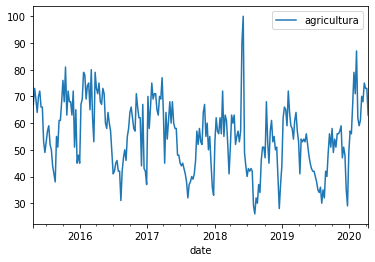

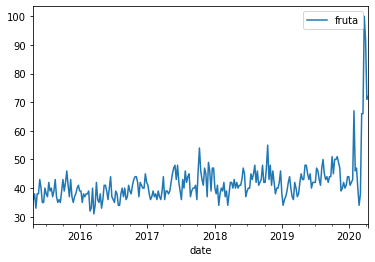

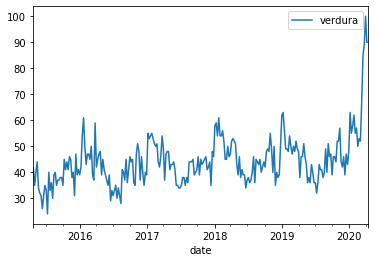

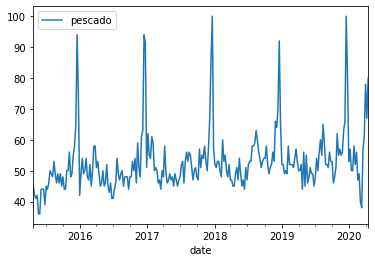

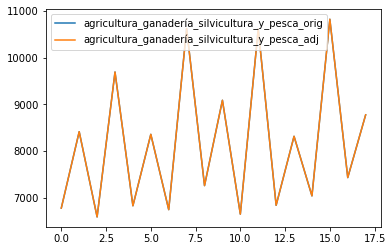

In [30]:
pred_agricultura, trends_agricultura = predict_rubro(df,
                                                     'agricultura_ganadería_silvicultura_y_pesca', dict_palabras, 
                                                     use_external=False, ciclo=1,
                                                     delay=0, trend='ct', extract=extract_config)

### 9. construccion
VABpb Construcción (F, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Trends Plot
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=265.871, BIC=275.142, Fit time=1.754 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=267.739, BIC=276.238, Fit time=1.410 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan sec

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=249.839, BIC=258.338, Fit time=2.341 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_orde

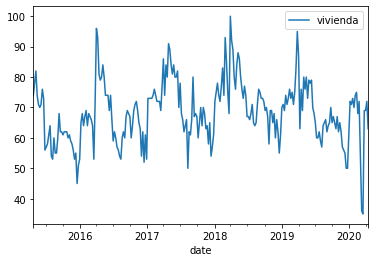

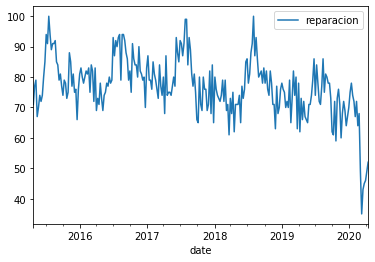

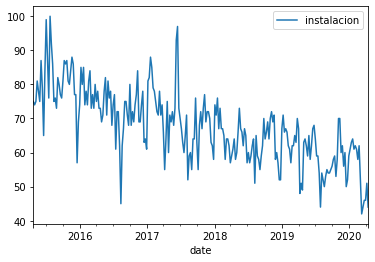

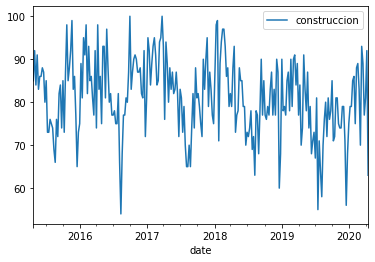

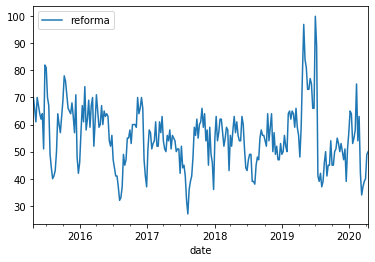

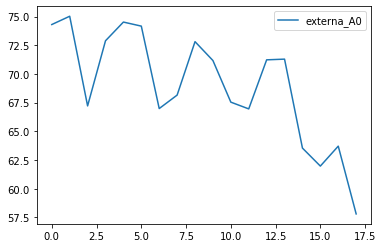

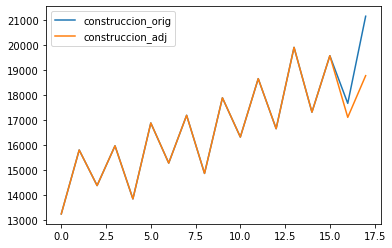

In [48]:
pred_construccion, trends_construccion = predict_rubro(df, 
                                                       'construccion', dict_palabras, 
                                                       use_external=True, ciclo=1,
                                                       delay=0, trend='ct', extract=extract_config)

### 10. profesionales_cientificas_tecnicas_otras
VABpb Servicios. Actividades profesionales, científicas y técnicas y otras (M-N, CNAE 2009)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Trends Plot
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=297.346, BIC=306.617, Fit time=2.223 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit A

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=250.153, BIC=258.652, Fit time=1.689 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=248.677, BIC=256.403, Fit time=1.536 seconds
Fit ARIMA: order=(2, 0, 3) sea

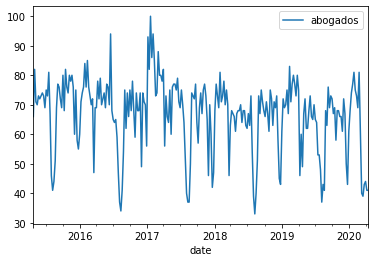

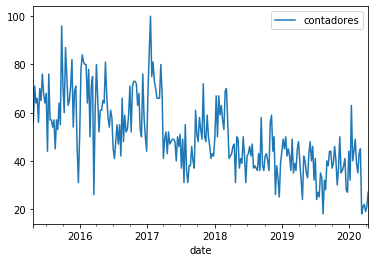

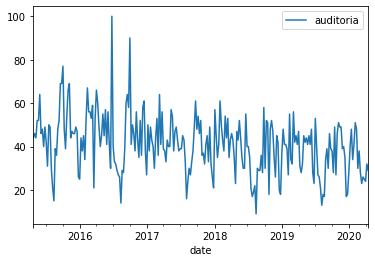

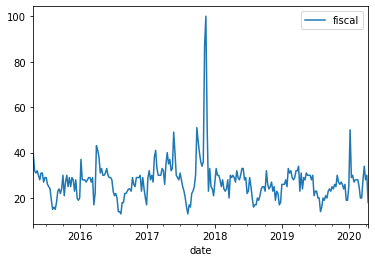

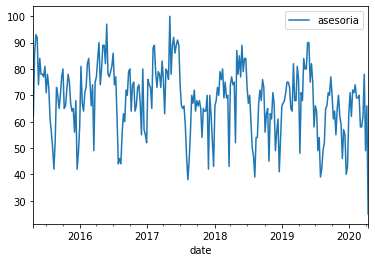

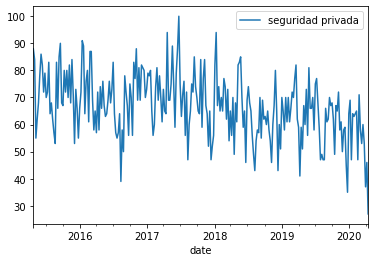

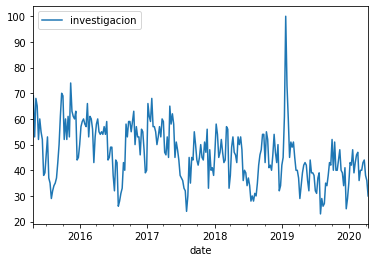

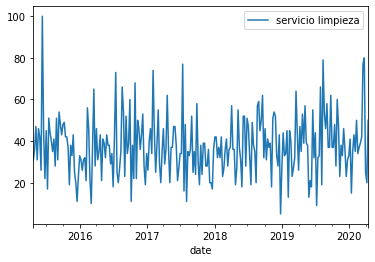

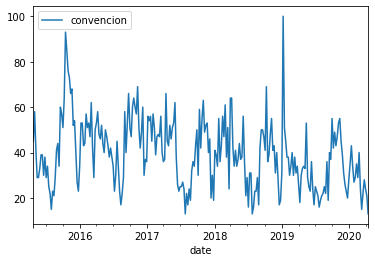

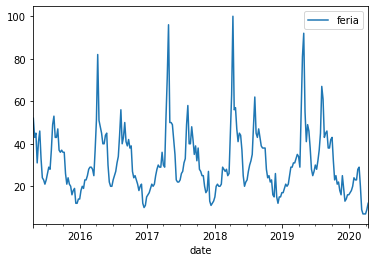

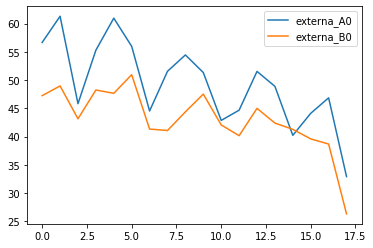

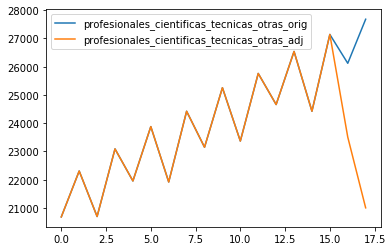

In [32]:
pred_profesionales, trends_profesionales = predict_rubro(df, 
                                                         'profesionales_cientificas_tecnicas_otras', dict_palabras, 
                                                         use_external=True, ciclo=1,
                                                         delay=0, trend='ct', extract=extract_config)

### 11. impuestos

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=287.611, BIC=295.337, Fit time=2.079 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=286.378, BIC=294.876, Fit time=1.448 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=278.096, BIC=285.822, Fit time=1.792 seconds
Fit ARIMA: order=(2, 0, 3) sea

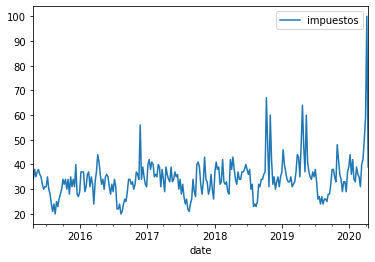

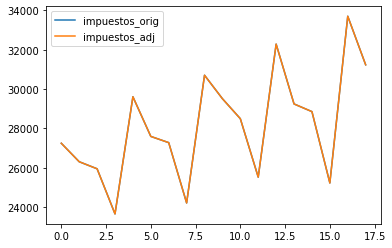

In [33]:
pred_impuestos, trends_impuestos = predict_rubro(df, 
                                                 'impuestos', dict_palabras, 
                                                 use_external=False, ciclo=1,
                                                 delay=0, trend='ct', extract=extract_config)

# Consolidacion de las predicciones del Ciclo 1: PIB

In [34]:
column_1_orig = pred_agricultura[list(pred_agricultura.filter(like='orig').columns)]
column_2_orig = pred_comerc_hotel[list(pred_comerc_hotel.filter(like='orig').columns)]
column_3_orig = pred_construccion[list(pred_construccion.filter(like='orig').columns)]
column_4_orig = pred_financieras[list(pred_financieras.filter(like='orig').columns)]
column_5_orig = pred_industria[list(pred_industria.filter(like='orig').columns)]
column_6_orig = pred_inmobiliaria[list(pred_inmobiliaria.filter(like='orig').columns)]
column_7_orig = pred_profesionales[list(pred_profesionales.filter(like='orig').columns)]
column_8_orig = pred_publi_educ_sani[list(pred_publi_educ_sani.filter(like='orig').columns)]
column_9_orig = pred_info_comunic[list(pred_info_comunic.filter(like='orig').columns)]
column_10_orig = pred_impuestos[list(pred_impuestos.filter(like='orig').columns)]
column_11_orig = pred_recreativas[list(pred_recreativas.filter(like='orig').columns)]


column_1_adj = pred_agricultura[list(pred_agricultura.filter(like='adj').columns)]
column_2_adj = pred_comerc_hotel[list(pred_comerc_hotel.filter(like='adj').columns)]
column_3_adj = pred_construccion[list(pred_construccion.filter(like='adj').columns)]
column_4_adj = pred_financieras[list(pred_financieras.filter(like='adj').columns)]
column_5_adj = pred_industria[list(pred_industria.filter(like='adj').columns)]
column_6_adj = pred_inmobiliaria[list(pred_inmobiliaria.filter(like='adj').columns)]
column_7_adj = pred_profesionales[list(pred_profesionales.filter(like='adj').columns)]
column_8_adj = pred_publi_educ_sani[list(pred_publi_educ_sani.filter(like='adj').columns)]
column_9_adj = pred_info_comunic[list(pred_info_comunic.filter(like='adj').columns)]
column_10_adj = pred_impuestos[list(pred_impuestos.filter(like='adj').columns)]
column_11_adj = pred_recreativas[list(pred_recreativas.filter(like='adj').columns)]

In [35]:
pred_PIB_orig = pd.concat([column_1_orig, column_2_orig, column_3_orig, column_4_orig, column_5_orig,
                           column_6_orig, column_7_orig, column_8_orig, column_9_orig, column_10_orig,
                           column_11_orig], join="inner", axis=1)


pred_PIB_orig['PIB']=pred_PIB_orig.sum(axis=1)

pred_PIB_adj = pd.concat([column_1_adj, column_2_adj, column_3_adj, column_4_adj, column_5_adj,
                           column_6_adj, column_7_adj, column_8_adj, column_9_adj, column_10_adj,
                           column_11_adj], join="inner", axis=1)


pred_PIB_adj['PIB']=pred_PIB_adj.sum(axis=1)

In [36]:
PIB_compare = pd.concat([pred_PIB_orig[['PIB']],pred_PIB_adj[['PIB']]],axis=1)
PIB_compare.columns = ['PIB_orig', 'PIB_adj']

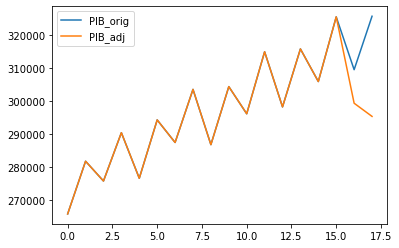

In [37]:
PIB_compare.plot()

In [38]:
PIB_compare

PIB_orig  PIB_adj
0     265844   265844
1     281788   281788
2     275793   275793
3     290415   290415
4     276630   276630
5     294280   294280
6     287451   287451
7     303517   303517
8     286801   286801
9     304350   304350
10    296143   296143
11    314899   314899
12    298222   298222
13    315755   315755
14    305893   305893
15    325461   325461
16    309480   299330
17    325646   295346

In [39]:
save_new = True

if save_new == True:
    PIB_compare[['PIB_adj']].to_csv('./data/PIB_adj_ciclo_1.csv',index=True)

In [40]:
print('1Q 2020 original: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[16,0] / PIB_compare.iloc[12,0] -1))
print('2Q 2020 original: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[17,0] / PIB_compare.iloc[13,0] -1))

1Q 2020 original: crecimiento proyectado interanual de 0.03775040070819724
2Q 2020 original: crecimiento proyectado interanual de 0.03132491963706041


In [41]:
print('1Q 2020 ajustado: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[16,1] / PIB_compare.iloc[12,0] -1))
print('2Q 2020 ajustado: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[17,1] / PIB_compare.iloc[13,0] -1))

1Q 2020 ajustado: crecimiento proyectado interanual de 0.0037153529920663786
2Q 2020 ajustado: crecimiento proyectado interanual de -0.06463555604820193


# Ciclo 2
- Si `ciclo = 2`, esto quiere decir que tenemos una primer proyección del PIB proveniente del `Ciclo 1`
- Aquellos sectores donde no utilizamos datos externos y por lo tanto no se vieron afectados en el `Ciclo 1` ahora pueden tener un impacto proveniente del efecto general en el PIB
- Esto lo incorporamos al modelo utilizando la proyección del PIB del Ciclo 1 como variable externa de todos aquellos sectores que tienen `use_external = False`

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 0, 1, 4); AIC=213.457, BIC=221.954, Fit time=2.267 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 4); AIC=214.784, BIC=222.573, Fit time=0.849 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARI

Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 1, 4); AIC=234.466, BIC=242.254, Fit time=2.375 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 0, 1, 4); AIC=237.836, BIC=244.917, Fit time=0.571 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(5, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 4); AIC=239.589, BIC=245.962, Fit time=1.542 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 1, 4); AIC=246.953, BIC=254.741, Fit time=1.603 seconds
Fit ARIMA:

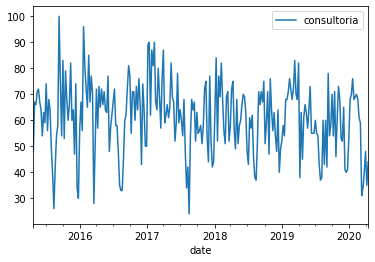

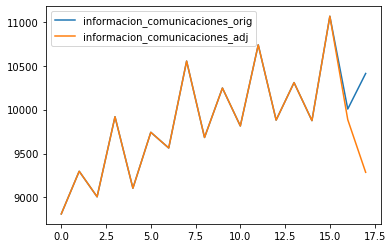

In [42]:
pred_info_comunic, trends_info_comunic = predict_rubro(df, 
                                                       'informacion_comunicaciones', dict_palabras, 
                                                       use_external=False, ciclo=2,
                                                       delay=0, trend='ct', extract=extract_config)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 3, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.032 seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(2, 0, 1, 4); AIC=282.347, BIC=288.561, Fit time=1.395 seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: orde

Fit ARIMA: order=(2, 3, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.025 seconds
Fit ARIMA: order=(3, 3, 2) seasonal_order=(2, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(5, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(1, 0, 1, 4); AIC=288.952, BIC=294.037, Fit time=0.797 seconds
Fit ARIMA: order=(2, 3, 2) seasonal_order=(3, 0, 1, 4); AIC=243.533, BIC=249.747, Fit time=1.617 seconds
Fit ARIMA: order=(3, 3, 2) seasonal_order=(3, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.050 seconds
Fit ARIMA: order=(3, 3, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 3, 3) seasonal_order=(3, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.038 seconds
Fit ARIMA: order=(2, 3, 3) seasonal_order=(2, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.032 seconds
Fit ARIMA: order=(2, 3, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 3

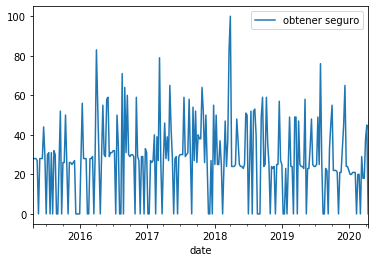

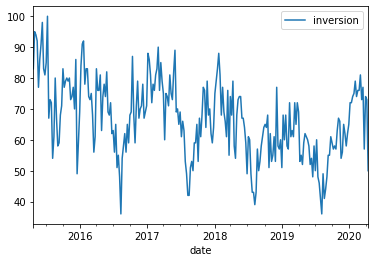

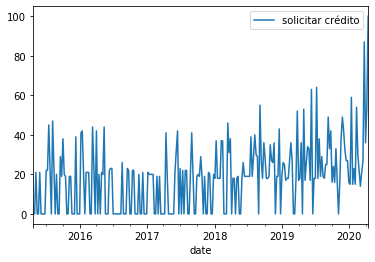

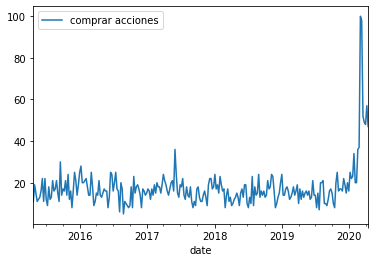

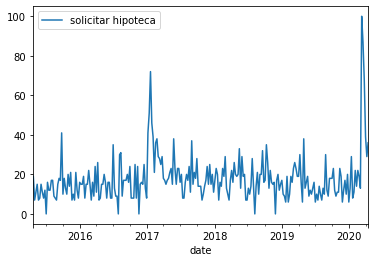

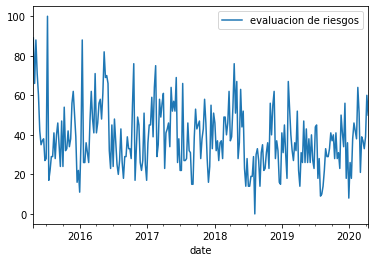

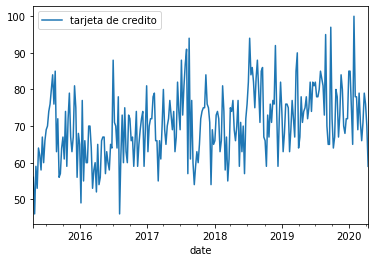

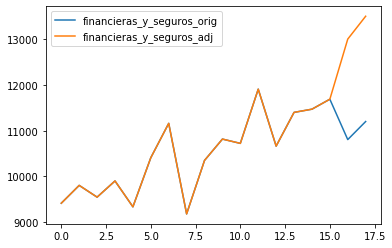

In [43]:
pred_financieras, trends_financieras = predict_rubro(df, 
                                                     'financieras_y_seguros', dict_palabras, 
                                                     use_external=False, ciclo=2,
                                                     delay=0 , trend='ct', extract=extract_config)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 1, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=0.031 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 4); AIC=274.865, BIC=282.653, Fit time=1.122 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: orde

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=344.688, BIC=354.732, Fit time=2.097 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=275.199, BIC=283.697, Fit time=3.547 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=280.309, BIC=288.034, Fit time=1.979 seconds
Fit ARIMA: order=(2,

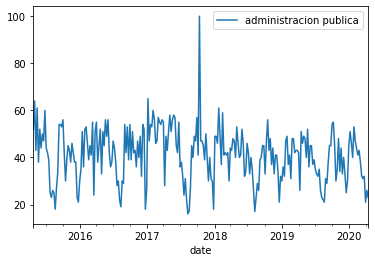

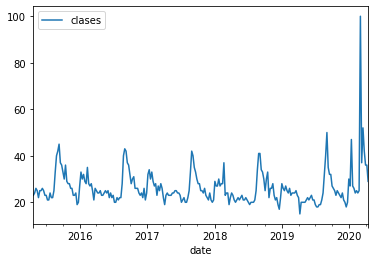

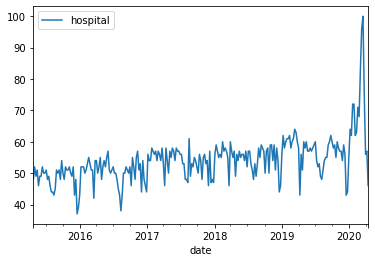

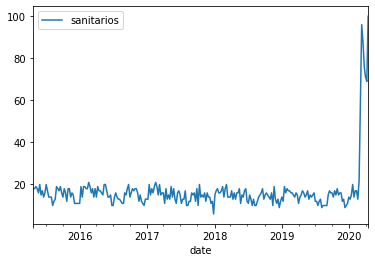

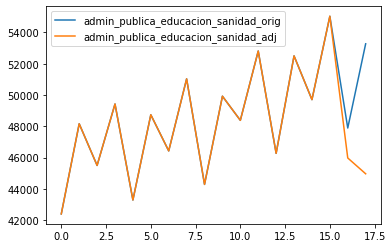

In [44]:
pred_publi_educ_sani, trends_publi_educ_sani = predict_rubro(df, 
                                                             'admin_publica_educacion_sanidad', dict_palabras,
                                                             use_external=False, ciclo=2,
                                                             delay=0, trend='ct', extract=extract_config)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=127092.597, BIC=127101.868, Fit time=0.651 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=287.771, BIC=296.270, Fit time=1.001 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
F

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=318.289, BIC=328.332, Fit time=3.074 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=294.744, BIC=303.243, Fit time=0.659 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=289.082, BIC=296.808, Fit time=0.957 seconds
Fit ARIMA: order=(2,

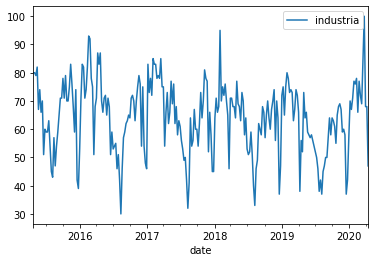

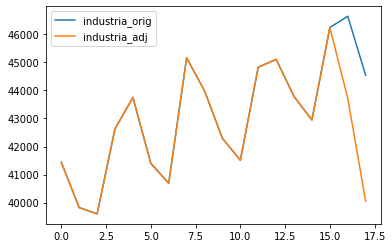

In [45]:
pred_industria, trends_industria = predict_rubro(df, 
                                                 'industria', dict_palabras, 
                                                 use_external=False, ciclo=2,
                                                 delay=0, trend='ct', extract=extract_config)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=275.495, BIC=283.994, Fit time=0.437 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=302.586, BIC=312.630, Fit time=4.645 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=269.363, BIC=277.861, Fit time=2.460 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=257.642, BIC=265.368, Fit time=0.773 seconds
Fit ARIMA: order=(2,

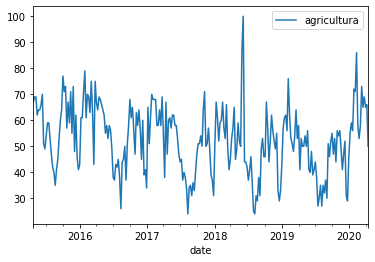

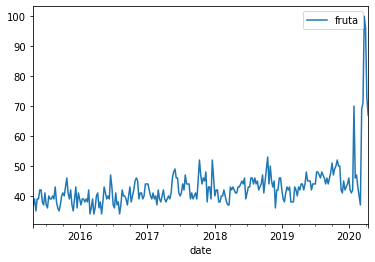

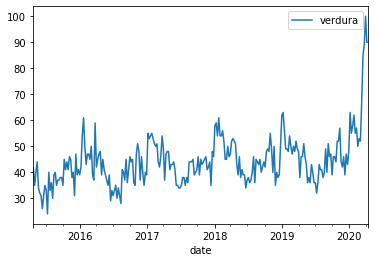

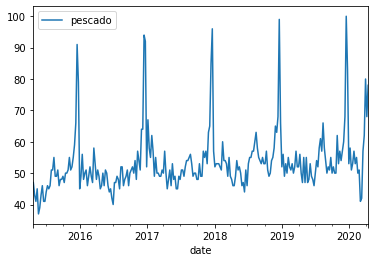

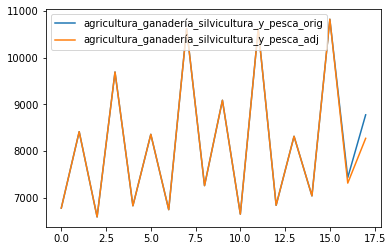

In [46]:
pred_agricultura, trends_agricultura = predict_rubro(df,
                                                     'agricultura_ganadería_silvicultura_y_pesca', dict_palabras, 
                                                     use_external=False, ciclo=2,
                                                     delay=0, trend='ct', extract=extract_config)

Obteniendo los datos de Google Trends...
Preparando los datos para entrenamiento y test...
Prediciendo con ajustes...
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(3, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=308.529, BIC=317.028, Fit time=0.968 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=

Fit ARIMA: order=(3, 0, 3) seasonal_order=(3, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 4, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 3, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(4, 0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 1, 4); AIC=286.378, BIC=294.876, Fit time=1.362 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 5, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(2, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(1, 0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=278.096, BIC=285.822, Fit time=1.852 seconds
Fit ARIMA: order=(2, 0, 3) sea

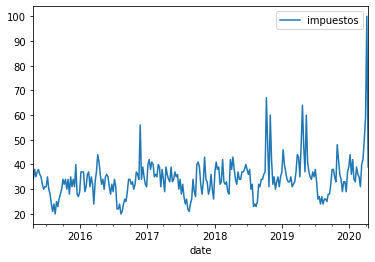

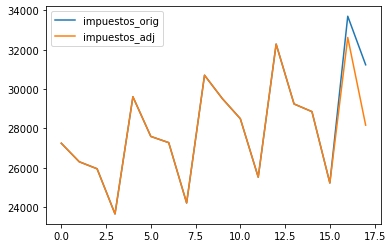

In [49]:
pred_impuestos, trends_impuestos = predict_rubro(df, 
                                                 'impuestos', dict_palabras, 
                                                 use_external=False, ciclo=2,
                                                 delay=0, trend='ct', extract=extract_config)

# Consolidacion de las predicciones del Ciclo 2: PIB

In [50]:
column_1_orig = pred_agricultura[list(pred_agricultura.filter(like='orig').columns)]
column_2_orig = pred_comerc_hotel[list(pred_comerc_hotel.filter(like='orig').columns)]
column_3_orig = pred_construccion[list(pred_construccion.filter(like='orig').columns)]
column_4_orig = pred_financieras[list(pred_financieras.filter(like='orig').columns)]
column_5_orig = pred_industria[list(pred_industria.filter(like='orig').columns)]
column_6_orig = pred_inmobiliaria[list(pred_inmobiliaria.filter(like='orig').columns)]
column_7_orig = pred_profesionales[list(pred_profesionales.filter(like='orig').columns)]
column_8_orig = pred_publi_educ_sani[list(pred_publi_educ_sani.filter(like='orig').columns)]
column_9_orig = pred_info_comunic[list(pred_info_comunic.filter(like='orig').columns)]
column_10_orig = pred_impuestos[list(pred_impuestos.filter(like='orig').columns)]
column_11_orig = pred_recreativas[list(pred_recreativas.filter(like='orig').columns)]


column_1_adj = pred_agricultura[list(pred_agricultura.filter(like='adj').columns)]
column_2_adj = pred_comerc_hotel[list(pred_comerc_hotel.filter(like='adj').columns)]
column_3_adj = pred_construccion[list(pred_construccion.filter(like='adj').columns)]
column_4_adj = pred_financieras[list(pred_financieras.filter(like='adj').columns)]
column_5_adj = pred_industria[list(pred_industria.filter(like='adj').columns)]
column_6_adj = pred_inmobiliaria[list(pred_inmobiliaria.filter(like='adj').columns)]
column_7_adj = pred_profesionales[list(pred_profesionales.filter(like='adj').columns)]
column_8_adj = pred_publi_educ_sani[list(pred_publi_educ_sani.filter(like='adj').columns)]
column_9_adj = pred_info_comunic[list(pred_info_comunic.filter(like='adj').columns)]
column_10_adj = pred_impuestos[list(pred_impuestos.filter(like='adj').columns)]
column_11_adj = pred_recreativas[list(pred_recreativas.filter(like='adj').columns)]

In [51]:
pred_PIB_orig = pd.concat([column_1_orig, column_2_orig, column_3_orig, column_4_orig, column_5_orig,
                           column_6_orig, column_7_orig, column_8_orig, column_9_orig, column_10_orig,
                           column_11_orig], join="inner", axis=1)


pred_PIB_orig['PIB']=pred_PIB_orig.sum(axis=1)

pred_PIB_adj = pd.concat([column_1_adj, column_2_adj, column_3_adj, column_4_adj, column_5_adj,
                           column_6_adj, column_7_adj, column_8_adj, column_9_adj, column_10_adj,
                           column_11_adj], join="inner", axis=1)


pred_PIB_adj['PIB']=pred_PIB_adj.sum(axis=1)

In [52]:
PIB_compare = pd.concat([pred_PIB_orig[['PIB']],pred_PIB_adj[['PIB']]],axis=1)
PIB_compare.columns = ['PIB_orig', 'PIB_adj']

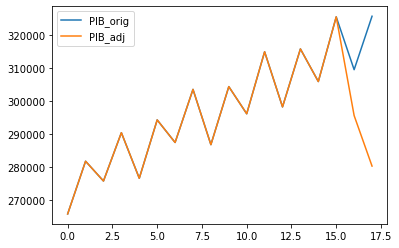

In [53]:
PIB_compare.plot()

In [54]:
save_new = True

if save_new == True:
    PIB_compare[['PIB_adj']].to_csv('./data/PIB_adj_ciclo_2.csv',index=True)

In [55]:
print('1Q 2020 original: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[16,0] / PIB_compare.iloc[12,0] -1))
print('2Q 2020 original: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[17,0] / PIB_compare.iloc[13,0] -1))

1Q 2020 original: crecimiento proyectado interanual de 0.03775040070819724
2Q 2020 original: crecimiento proyectado interanual de 0.03132491963706041


In [56]:
print('1Q 2020 ajustado: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[16,1] / PIB_compare.iloc[12,0] -1))
print('2Q 2020 ajustado: crecimiento proyectado interanual de {}'.format(PIB_compare.iloc[17,1] / PIB_compare.iloc[13,0] -1))

1Q 2020 ajustado: crecimiento proyectado interanual de -0.008802167512792503
2Q 2020 ajustado: crecimiento proyectado interanual de -0.11223891941536956


# Predicciones de 3Q 2020, 4Q 2020 y 2021

In [57]:
PIB_ciclo_2 = pd.read_csv('./data/PIB_adj_ciclo_2.csv', index_col=0)

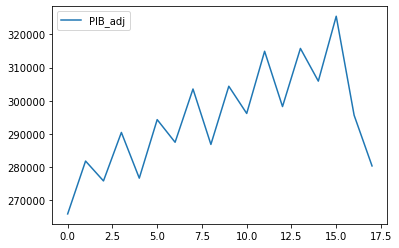

In [58]:
PIB_ciclo_2.plot()

In [59]:
# Definimos un parámetro de cuánto transfiere un trimestre su efecto al siguiente
efecto_traslado = 0.5

# Creamos un índice de recuperación (0.00 significa sin recuperación, 1.00 significa 100% recuperado)
mejora_situacion_2Q20 = 0.20
mejora_situacion_3Q20 = 0.30
mejora_situacion_4Q20 = 0.50
mejora_situacion_1Q21 = 0.75
mejora_situacion_2Q21 = 0.80
mejora_situacion_3Q21 = 0.90
mejora_situacion_4Q21 = 1.00


I1Q20 = 1
I2Q20 = I1Q20*efecto_traslado + 1*(1-mejora_situacion_2Q20)
I3Q20 = I2Q20*efecto_traslado + 1*(1-mejora_situacion_3Q20)
I4Q20 = I3Q20*efecto_traslado + 1*(1-mejora_situacion_4Q20)
I1Q21 = I4Q20*efecto_traslado + 1*(1-mejora_situacion_1Q21)
I2Q21 = I1Q21*efecto_traslado + 1*(1-mejora_situacion_2Q21)
I3Q21 = I2Q21*efecto_traslado + 1*(1-mejora_situacion_3Q21)
I4Q21 = I3Q21*efecto_traslado + 1*(1-mejora_situacion_4Q21)


indice_recuperacion = pd.DataFrame({'indice':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                              I1Q20, I2Q20, I3Q20, I4Q20,
                                              I1Q21, I2Q21, I3Q21, I4Q21]})

# indice_recuperacion = pd.DataFrame({'indice':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                                               1, 1, 0, 0,
#                                               0, 0, 0, 0]})

indice_recuperacion

indice
0   0.000000
1   0.000000
2   0.000000
3   0.000000
4   0.000000
5   0.000000
6   0.000000
7   0.000000
8   0.000000
9   0.000000
10  0.000000
11  0.000000
12  0.000000
13  0.000000
14  0.000000
15  0.000000
16  1.000000
17  1.300000
18  1.350000
19  1.175000
20  0.837500
21  0.618750
22  0.409375
23  0.204687

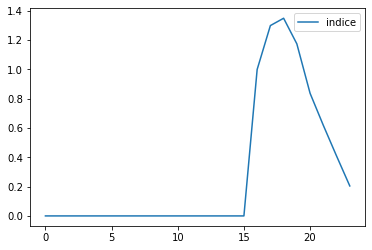

In [60]:
indice_recuperacion.plot()

In [61]:
indice_recuperacion_train = indice_recuperacion[0:18]
indice_recuperacion_train['quarter'] = ["1","2","1","2","1","2","1","2","1","2","1","2","1","2","1","2","1","2"]
indice_recuperacion_train['anio'] = ['2016','2016','2016','2016',
                                     '2017','2017','2017','2017',
                                     '2018','2018','2018','2018',
                                     '2019','2019','2019','2019',
                                     '2019','2019']

indice_recuperacion_test = indice_recuperacion[18:26]
indice_recuperacion_test['quarter'] = ["1","2","1","2","1","2"]
indice_recuperacion_test['anio'] = ['2019','2019','2019','2019','2019','2019']
indice_recuperacion_train

indice quarter  anio
0      0.0       1  2016
1      0.0       2  2016
2      0.0       1  2016
3      0.0       2  2016
4      0.0       1  2017
5      0.0       2  2017
6      0.0       1  2017
7      0.0       2  2017
8      0.0       1  2018
9      0.0       2  2018
10     0.0       1  2018
11     0.0       2  2018
12     0.0       1  2019
13     0.0       2  2019
14     0.0       1  2019
15     0.0       2  2019
16     1.0       1  2019
17     1.3       2  2019

# Modelo para predecir futuros trimestres

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
X_train = indice_recuperacion_train
X_test = indice_recuperacion_test
y_train = PIB_ciclo_2

In [64]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=1000, criterion='mse', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                           bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                           warm_start=False)

gb = GradientBoostingRegressor(n_estimators=1000)

In [65]:
dt_model = dt.fit(X_train, y_train)
rf_model = rf.fit(X_train, y_train)
gb_model = gb.fit(X_train, y_train)

In [66]:
prediccion_dt = dt_model.predict(X_test)
prediccion_dt_df = pd.DataFrame(prediccion_dt, columns=['PIB_adj'])

prediccion_rf = rf_model.predict(X_test)
prediccion_rf_df = pd.DataFrame(prediccion_rf, columns=['PIB_adj'])

prediccion_gb = gb_model.predict(X_test)
prediccion_gb_df = pd.DataFrame(prediccion_gb, columns=['PIB_adj'])

In [67]:
prediccion_total_dt = PIB_ciclo_2.append(prediccion_dt_df).reset_index(drop=True).astype('int')
prediccion_total_rf = PIB_ciclo_2.append(prediccion_rf_df).reset_index(drop=True).astype('int')
prediccion_total_gb = PIB_ciclo_2.append(prediccion_gb_df).reset_index(drop=True).astype('int')

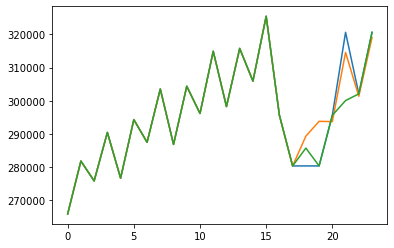

In [68]:
plt.plot(prediccion_total_dt)
plt.plot(prediccion_total_rf)
plt.plot(prediccion_total_gb)

In [69]:
prediccion_total_gb

PIB_adj
0    265844
1    281788
2    275793
3    290415
4    276630
5    294280
6    287451
7    303517
8    286801
9    304350
10   296143
11   314899
12   298222
13   315755
14   305893
15   325461
16   295597
17   280315
18   285695
19   280314
20   295597
21   300026
22   302057
23   320607

In [70]:
print('1Q 2020 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[16,0] / prediccion_total_gb.iloc[12,0] -1))
print('2Q 2020 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[17,0] / prediccion_total_gb.iloc[13,0] -1))
print('3Q 2021 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[18,0] / prediccion_total_gb.iloc[14,0] -1))
print('4Q 2021 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[19,0] / prediccion_total_gb.iloc[15,0] -1))
print('1Q 2021 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[20,0] / prediccion_total_gb.iloc[16,0] -1))
print('2Q 2021 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[21,0] / prediccion_total_gb.iloc[17,0] -1))
print('3Q 2021 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[22,0] / prediccion_total_gb.iloc[18,0] -1))
print('4Q 2021 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[23,0] / prediccion_total_gb.iloc[19,0] -1))

1Q 2020 ajustado: crecimiento proyectado interanual de -0.008802167512792503
2Q 2020 ajustado: crecimiento proyectado interanual de -0.11223891941536956
3Q 2021 ajustado: crecimiento proyectado interanual de -0.06602962473806195
4Q 2021 ajustado: crecimiento proyectado interanual de -0.1387170813092813
1Q 2021 ajustado: crecimiento proyectado interanual de 0.0
2Q 2021 ajustado: crecimiento proyectado interanual de 0.07031732158464576
3Q 2021 ajustado: crecimiento proyectado interanual de 0.05727086578344043
4Q 2021 ajustado: crecimiento proyectado interanual de 0.14374237462274442


In [71]:
print('2020 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[16:20,].sum()[0]/prediccion_total_gb.iloc[12:16,].sum()[0]-1))
print('2020 ajustado: crecimiento proyectado interanual de {}'.format(prediccion_total_gb.iloc[20:24,].sum()[0]/prediccion_total_gb.iloc[16:20,].sum()[0]-1))

2020 ajustado: crecimiento proyectado interanual de -0.08303816415073584
2020 ajustado: crecimiento proyectado interanual de 0.06687502900813636
